# Spotify Sentiment Analysis: The Music that Shaped the Decade

## Introduction

Spotify is one of the top music streaming platforms in America. With its vast library of artists, and playlists, users can listen to songs on Spotify for days. Yet, users gravitate to what they like--their favorite genres, artists, and songs. This project looks at three datasets provided by Spotify, illustrating the trends of the various users of the platform. We see the full dataset of users and the songs played by these users. We can see the top users of the platform, and what they liked to listen to. Then we take a look at the top 10 dataset for the period of 2010 to 2019. This is comprised of the superstars of the music world: any artist that made the top 10 most followed artist list of each respective year. Finally, we have the unpopular dataset, which shows the less memorable artists and songs on the platform. Overall, we see the artist and genre trends of the decade, but what shaped these listening preferences? What world events and trends were prevalent during this time frame? We know the events that shaped the decade, but does the music mirror the sentiment of the times. 

## Initialization and overview

### Installing and loading Libraries

In [1]:
import pandas as pd 
import plotly_express as px
import plotly.graph_objects as go
import json
import plotly.figure_factory as ff
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
# function to convert to json
def convert_json(df):
    df_json = df.to_json()
    data = json.loads(df_json)
    new_df = json.dumps(data, indent=2)
    return print(new_df)

### Full dataset

#### Loading full Dataset

In [3]:
# first dataset
try:
    url1 = 'spotify_dataset.csv'
    full = pd.read_csv(url1, on_bad_lines='skip', names=['user_id', 'artist_name', 'track_name', 'playlist_name'])
    print('local')
except:
    print('remote')
    url1 = 'https://media.githubusercontent.com/media/dataPracticum/codepudding/main/spotify/spotify_dataset.csv'
    full = pd.read_csv(url1, on_bad_lines='skip', names=['user_id', 'artist_name', 'track_name', 'playlist_name'])

remote


#### Checking the dataset

In [4]:
# Lets look at a sample of the dataset
full.sample(5)

user_id      artist_name  \
10000826  15a630d2538221cc201e52b9a0976049            Banks   
7609366   6022fc74d825648765c8d6d3c3c9051e  Love of Lesbian   
3524423   7ac590780bbf6c189f175aeced369563           Escort   
8901309   9e775eb8dd0f4b1af0726c6b26c67c5c   The Black Keys   
2297874   00123e0f544dee3ab006aa7f1e5725a7       Neil Young   

                          track_name          playlist_name  
10000826  This Is What It Feels Like                sam2014  
7609366    Los Colores De Una Sombra                    LoL  
3524423           Caméleon Chameleon                   90.9  
8901309                   Tighten Up                  mdrey  
2297874   Cowgirl In The Sand - Live  ALL ROCK ARTIST LISTS

In [5]:
# info on the columns
display(full.info())
print()
full.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12891681 entries, 0 to 12891680
Data columns (total 4 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        object
 1   artist_name    object
 2   track_name     object
 3   playlist_name  object
dtypes: object(4)
memory usage: 393.4+ MB


None

Index(['user_id', 'artist_name', 'track_name', 'playlist_name'], dtype='object')

While running `full.info()` does tell us column names, it does not do a good job at letting us see if there are extra spaces. We can use `full.columns` for that. We can also turn the column names into a list using `full.columns.tolist()`

In [6]:
# missing values
full.isna().sum()

user_id              0
artist_name      33568
track_name          85
playlist_name     1246
dtype: int64

In [7]:
# percentage of values that are missing
full.artist_name.isna().sum() / len(full.artist_name) * 100

0.26038497229337276

In [8]:
# top 100 most common artists
full.artist_name.value_counts().nlargest(100)

Daft Punk             36086
Coldplay              35485
Radiohead             31429
The Rolling Stones    30832
Kanye West            29111
                      ...  
Weezer                11638
The White Stripes     11617
Pitbull               11199
Bruno Mars            11037
blink-182             11024
Name: artist_name, Length: 100, dtype: int64

In [9]:
# most common playlists
full.playlist_name.value_counts().nlargest(100)

Starred                  1337085
Liked from Radio          180083
Favoritas de la radio      30425
Rock                       30142
2014                       22680
                          ...   
HipHop                      7558
80s                         7523
Kitchen Sink                7511
iTunes                      7488
josep                       7463
Name: playlist_name, Length: 100, dtype: int64

In [10]:
# drop missing 
full.dropna(inplace=True)

In [12]:
full.sample(10).to_csv('full sample.csv')

In [13]:
# Check size 
full.shape

(12856839, 4)

In [14]:
# overview 
full.describe()

user_id artist_name track_name playlist_name
count                           12856839    12856839   12856839      12856839
unique                             15915      289604    2004524        157321
top     4398de6902abde3351347b048fcdc287   Daft Punk      Intro       Starred
freq                              295274       36086       6675       1334319

In [15]:
# unique artists percentage
full.artist_name.nunique() / len(full.artist_name) * 100

2.2525287903193

We see the full dataset is very large, comprised of columns : user id, artist name, track name, and playlist name. We have a small percentage of missing values in artist name, and we will get rid of all the missing values in the dataset. With artist name having the most missing values, but less than half a percent is actually missing, the other datasets will have a miniscule number of missing values as well. We look at the number of unique artists, which attests that the vast majority of artists appear more than once. We also take a list view of the most popular artists, and the most popular playlists. 

#### EDA

In [16]:
# Most common artists of the decade
number = [5, 10, 20, 50, 100]

for n in number:
    top_artist = full.artist_name.value_counts().nlargest(n)
    px.bar(top_artist, title='Top ' + str(n) +  ' Most Common Artists of the Decade', height=600, template='plotly_dark', color_discrete_sequence=['green'], labels={'index': 'Artist', 'value': 'Listens'}).show()

Here, we illustrate the most common artists of the decade, from the top 5 to the top 100 artists. This visualization shows how some artists remain popular for a longer time period, while other artits fade quickly, when comparing the visualizations of each individual year. What may account for this particular list of artists is the events that ocurred in the decade: from movie soundtracks, award shows, fashion shows, and tv features of the respective artists. 

In [17]:
# Artist of the decade percentage
number = [5, 10, 20]

for n in number:
    top_artist = full.artist_name.value_counts(normalize=True).nlargest(n) * 100
    px.bar(top_artist, title='Top ' + str(n) +  ' Most Common Artists of the Decade as Percentage', height=600, log_y=True, template='plotly_dark', color_discrete_sequence=['green'], labels={'index': 'Artist', 'value': 'Percentage of All Artists'}).show()

Although these artists are the most popular among the dataset, the total of their songs account for less than .5% of the dataset. This further illustrates the how large the dataset is. Tjis is just another way of illustrating the prevalence of each artist among the total list of artists. 

In [18]:
# playlists of the decade
number = [5, 10, 15, 25]

for n in number:
    top_playlists = full.playlist_name.value_counts().nlargest(n)
    px.bar(top_playlists, title='Top ' + str(n) +  ' Most Common Playlists of the Decade', height=600, template='plotly_dark', color_discrete_sequence=['green'], labels={'index': 'Playlist', 'value': 'Number of Songs'}).show()

According to Spotify, the starred playlist is comprised of songs that the user listened to, and subsequently starred. All those songs are compiled into one playlist, and it is named the Starred playlist. Although the playlist name would be the same for each user, the contents are determined by the preferences of the user. This explains why the starred playlist is magnitudes greater than any other playlist. It would be fair to assume that most of the regular Spotify users have contributed tracks to that playlist by starring a few songs.

In [19]:
# most active users
full.user_id.value_counts().nlargest(20)

4398de6902abde3351347b048fcdc287    295274
7ee2b92c5bcf6133b8132363e5bda960     90628
99deafd9b792af8e6a535483088faef2     65909
fa849dabeb14a2800ad5130907fc5018     60608
6b85a8076b4f3b1036ef15f09e2feeeb     39592
ed140fce438f59e6e07e5ee7bd726692     33196
2fa1f93e57cfe2f6c4456e98da54061c     31589
c0efe4e704a37894150489b25eac9042     25959
c410ee930bd5f0e4893632503ec17b05     25274
c2d2fed26e858f82fdd8ac2e791cab1f     24855
d49c0fdadc701f66d10aec118604f4b7     24626
a9f844ceb4d928d7ff7c189211f301c5     22721
32b524ed367b1e5a714228fbec80849d     22202
f2604a69836c94d00fcd11dd602944fc     19494
c943688082716a65120321b4a0b15979     18958
61baddf7207fea410abdc56e680fa869     18896
68756b4d60b6fac27789e85c2b63d1c6     18856
95c206362d58124cad87e82b9c3652a6     18736
00123e0f544dee3ab006aa7f1e5725a7     18520
ce7eab9cbb66a49a8b71c751458e8663     18318
Name: user_id, dtype: int64

In [20]:
# Averag amount of songs each user listened to
full.user_id.value_counts().mean()

807.84410933082

In [21]:
# Number of users hwo listened to more than the mean amount of songs
(full.user_id.value_counts() > full.user_id.value_counts().mean()).sum()

4330

In [22]:
# Averag amount of songs each user listened to
full.user_id.value_counts().median()

357.0

In [23]:
# Number of users hwo listened to more than the median amount of songs
(full.user_id.value_counts() > full.user_id.value_counts().median()).sum()

7957

In [24]:
# Top spotify listeners
px.bar(full.user_id.value_counts().nlargest(20), title='Top Spotify Listeners', height=800, template='plotly_dark', color_discrete_sequence=['green'], labels={'index': 'Top Listeners', 'value': 'Number of Listens'})

The top user of the platform listened to over 295,000 songs. The second top user listened to a fraction of that: 90,600 songs. Given that users on average listened to 808 songs, and the median is 357 songs, these users at first glance look like outliers. However, 4,330 users listened to more than the average amount of songs, and 7,957 users listened to more than the median amount of songs. With 295,000 songs at one minute each played 24 hours a day is 204 days. This is certainly an outlier, perhaps this is music played in a shop or a venue that has background music playing all day.

In [25]:
# Top listeners on the platform list
top_listeners = full.user_id.value_counts().nlargest(20).to_dict()
top_listeners

{'4398de6902abde3351347b048fcdc287': 295274,
 '7ee2b92c5bcf6133b8132363e5bda960': 90628,
 '99deafd9b792af8e6a535483088faef2': 65909,
 'fa849dabeb14a2800ad5130907fc5018': 60608,
 '6b85a8076b4f3b1036ef15f09e2feeeb': 39592,
 'ed140fce438f59e6e07e5ee7bd726692': 33196,
 '2fa1f93e57cfe2f6c4456e98da54061c': 31589,
 'c0efe4e704a37894150489b25eac9042': 25959,
 'c410ee930bd5f0e4893632503ec17b05': 25274,
 'c2d2fed26e858f82fdd8ac2e791cab1f': 24855,
 'd49c0fdadc701f66d10aec118604f4b7': 24626,
 'a9f844ceb4d928d7ff7c189211f301c5': 22721,
 '32b524ed367b1e5a714228fbec80849d': 22202,
 'f2604a69836c94d00fcd11dd602944fc': 19494,
 'c943688082716a65120321b4a0b15979': 18958,
 '61baddf7207fea410abdc56e680fa869': 18896,
 '68756b4d60b6fac27789e85c2b63d1c6': 18856,
 '95c206362d58124cad87e82b9c3652a6': 18736,
 '00123e0f544dee3ab006aa7f1e5725a7': 18520,
 'ce7eab9cbb66a49a8b71c751458e8663': 18318}

In [26]:
# What artists did the top listener like
top_listener_artists = pd.DataFrame(full.query("user_id == '4398de6902abde3351347b048fcdc287'")['artist_name'].value_counts().nlargest(10))

In [27]:
top_listener_artists.reset_index(inplace=True)
top_listener_artists.columns = ['artist', 'count']
top_listener_artists

artist  count
0                   M83    143
1          Boyce Avenue    140
2              Bastille    138
3      Crystal Fighters    130
4          Yann Tiersen    129
5   The Gaslight Anthem    128
6          Audiomachine    124
7  They Might Be Giants    123
8          Frank Turner    122
9      Guided By Voices    118

In [28]:
# Dataframes of top ten artists of top 10 listeners
for keys in top_listeners:
    display(pd.DataFrame(full[full['user_id'] == keys]['artist_name'].value_counts().nlargest(10)))
    

artist_name
M83                           143
Boyce Avenue                  140
Bastille                      138
Crystal Fighters              130
Yann Tiersen                  129
The Gaslight Anthem           128
Audiomachine                  124
They Might Be Giants          123
Frank Turner                  122
Guided By Voices              118

artist_name
Jamey Aebersold Play-A-Long         1633
John Zorn                            809
Frank Zappa                          793
Grateful Dead                        691
Noël Akchoté                         662
Stevie Wonder                        567
Philip Glass                         559
Robert Schumann                      484
Béla Bartók                          466
Igor Stravinsky                      455

artist_name
Miles Davis                 365
Dizzy Gillespie             361
Dave Brubeck                273
Oscar Peterson              273
The Avett Brothers          266
Dropkick Murphys            249
Chick Corea                 247
Charles Mingus              245
Bill Evans                  232
Wynton Marsalis             229

artist_name
Peggy Lee                  2116
Ella Fitzgerald            1826
Frank Sinatra              1807
Louis Armstrong            1573
The Rolling Stones         1147
Nat King Cole               897
B.B. King                   677
NOFX                        551
Snoop Dogg                  501
Queen                       456

artist_name
The Rolling Stones              978
Johnny Hallyday                 879
Loquillo y Trogloditas          805
Linda Ronstadt                  801
Led Zeppelin                    774
The Beatles                     768
Poco                            766
Nina Simone                     714
Mina                            714
Joaquin Sabina                  644

artist_name
R.E.M.                   308
Richard Strauss          207
Bob Dylan                188
The Clash                140
Woody Guthrie            137
David Bowie              113
Elvis Presley            112
John Denver              100
Howlin' Wolf              95
Anonymous                 92

artist_name
DJ Food                        400
The Meteors                    328
Talking Heads                  321
Capitalist Casualties          321
Messer Chups                   294
Nasum                          288
Conflict                       281
Fishbone                       256
Lamb                           233
Man Or Astro-Man?              227

artist_name
The Dubliners               469
Alkaline Trio               465
NOFX                        372
Against Me!                 355
Bright Eyes                 304
Frank Turner                299
The Avett Brothers          289
The Lawrence Arms           256
Django Reinhardt            255
The Chieftains              250

artist_name
Manic Street Preachers          205
Sonic Youth                     199
Guided By Voices                190
Radiohead                       169
Suede                           163
Caetano Veloso                  160
Pavement                        152
Al Green                        148
Charlie Brown JR.               139
Wilco                           136

artist_name
UFO                    290
Alice Cooper           289
Van Halen              245
Dokken                 237
Ozzy Osbourne          219
Rush                   214
Toto                   205
Queensrÿche            202
Cheap Trick            195
Thin Lizzy             188

artist_name
Pink Floyd                    318
Radiohead                     316
Genesis                       278
The Roots                     238
Beastie Boys                  238
Ani Difranco                  221
Rush                          220
Fishbone                      213
Thievery Corporation          211
Zero 7                        205

artist_name
Erroll Garner                     467
Oscar Peterson                    435
Marillion                         294
Rush                              256
Oscar Peterson Trio               256
Bill Evans                        235
UFO                               210
Dave Brubeck                      203
The Dave Brubeck Quartet          201
The Flower Kings                  196

artist_name
Ennio Morricone         1174
Jerry Goldsmith          455
Randy Newman             387
Danny Elfman             292
Thomas Newman            275
Hans Zimmer              244
Steve Jablonsky          169
Marco Borsato            164
Michael Jackson          163
Mike Massé               149

artist_name
Phish                                 478
The Avett Brothers                    281
Yonder Mountain String Band           214
Hot Buttered Rum                      151
KELLER WILLIAMS                       148
Sharon Jones & The Dap-Kings          137
The Who                               130
Stevie Wonder                         119
Michael Pollan                        119
Sarah Vowell                          117

artist_name
Busta Rhymes               909
Lil Wayne                  847
MC Lars                    582
Kanye West                 392
Sonic Youth                386
The Cure                   362
Dead Kennedys              353
Nicki Minaj                287
Johnny Thunders            279
Smashing Pumpkins          274

artist_name
Andrés Calamaro                  594
Ramones                          491
Rolling Stones                   315
Bad Religion                     310
NOFX                             295
Green Day                        283
Queen                            279
Charly García                    278
Los Fabulosos Cadillacs          258
Charly Garcia                    249

artist_name
The Mountain Goats           211
The Smiths                   181
Bob Dylan                    178
Sufjan Stevens               162
Grateful Dead                124
David Bowie                  124
The Magnetic Fields          121
Talking Heads                121
The Flaming Lips             116
Ryan Adams                   115

artist_name
Titi Robin                     195
Kitaro                         184
Prinz Pi                       133
Jean-Michel Jarre              113
Manu Chao                      110
Ry Cooder                       92
Les Cowboys Fringants           90
The Economist                   82
Dengue Fever                    80
Wyclef Jean                     79

artist_name
Hot Tuna               914
Neil Young             668
Jethro Tull            632
Tom Waits              585
David Grisman          581
Ry Cooder              547
Talking Heads          498
Joni Mitchell          454
Andrew Bird            420
Wilco                  398

artist_name
Kent                      375
Hocico                    355
Klasse Kriminale          328
Angelic Upstarts          298
Charta 77                 280
In Flames                 272
Desmond Dekker            271
Daft Punk                 266
Coldplay                  257
Combichrist               249

What the top listeners listened to . 

In [30]:
# dataframe of top listener
colorscale = [[0, 'rgb(27,158,119)'],[.5, 'rgb(242,242,242)'],[1, 'rgb(242,242,242)']]
top_listeners_fig = ff.create_table(top_listener_artists, colorscale=colorscale)
top_listeners_fig.show()

In [32]:
# favorite artists of the top listener
px.pie(data_frame=top_listener_artists, values=top_listener_artists['count'], 
names=top_listener_artists.artist, hover_name=top_listener_artists.artist, 
title='Favorite 10 Artists of Top Listener', height=700, template='plotly_dark')

What the top listener listened to. We see that, among the top 10 artists, each artist makes up roughly 10% of the total count. This further supports the theory that this user has made a playlist that shuffles through these artists, and plays music all day. When this top user is compared to the other 9 of the top 10 users, we ee differences in their respective distributions. Some users listened to each artist rather evenly, while some users favored one or a few artists. 

### Conclusions

We were able to demonstrate trends in the dataset for the most popular artists, most popular playlists, and the most active users. While the dataset does not have any further insights to extract, key insights that we do have are found in the top artists. Overall, we see that Daft Punk and Coldplay predominate the artist category on Spotify. Furthermore, it would take days of straight listening to become the number one user on Spotify. 

**************************************

### Top 10 dataset

In [33]:
# load top 10 dataset
url2 = 'https://raw.githubusercontent.com/dataPracticum/codepudding/main/spotify/top_by_year/top10s.csv'
top10 = pd.read_csv(url2, encoding='latin-1')

In [35]:
# Top 10 dataset
top10.head()

Unnamed: 0                 title      artist        top genre  year  bpm  \
0           1      Hey, Soul Sister       Train       neo mellow  2010   97   
1           2  Love The Way You Lie      Eminem  detroit hip hop  2010   87   
2           3               TiK ToK       Kesha        dance pop  2010  120   
3           4           Bad Romance   Lady Gaga        dance pop  2010  119   
4           5  Just the Way You Are  Bruno Mars              pop  2010  109   

   nrgy  dnce  dB  live  val  dur  acous  spch  pop  
0    89    67  -4     8   80  217     19     4   83  
1    93    75  -5    52   64  263     24    23   82  
2    84    76  -3    29   71  200     10    14   80  
3    92    70  -4     8   71  295      0     4   79  
4    84    64  -5     9   43  221      2     4   78

In [36]:
# top 10 columns
top10.columns

Index(['Unnamed: 0', 'title', 'artist', 'top genre', 'year', 'bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')

In [37]:
# summary look at columns
top10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  603 non-null    int64 
 1   title       603 non-null    object
 2   artist      603 non-null    object
 3   top genre   603 non-null    object
 4   year        603 non-null    int64 
 5   bpm         603 non-null    int64 
 6   nrgy        603 non-null    int64 
 7   dnce        603 non-null    int64 
 8   dB          603 non-null    int64 
 9   live        603 non-null    int64 
 10  val         603 non-null    int64 
 11  dur         603 non-null    int64 
 12  acous       603 non-null    int64 
 13  spch        603 non-null    int64 
 14  pop         603 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 70.8+ KB


In [38]:
#  confirm no missing values
top10.isna().sum()

Unnamed: 0    0
title         0
artist        0
top genre     0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64

In [39]:
# looking for duplicates
top10.duplicated().sum()

0

In [40]:
# rename top genre to genre
top10.rename(columns={'top genre': 'genre'}, inplace=True)

In [43]:
# remove unnamed column
top10 = top10.drop('Unnamed: 0', axis=1)

The top 10 dataset is clean with no missing values or duplicates. The dataset has about 600 rows, with columns that give various bits of information about each song. this information ranges from the release year, to the various metrics, and then is followed by Spotify's popularity score. This score likely considers the number streams a particular song had in the year. It would be interesting to discover which metric, if any, is positively correlated with the popularity of the song. 

In [44]:
# summary stats
top10.describe()

year         bpm        nrgy        dnce          dB  \
count   603.000000  603.000000  603.000000  603.000000  603.000000   
mean   2014.592040  118.545605   70.504146   64.379768   -5.578773   
std       2.607057   24.795358   16.310664   13.378718    2.798020   
min    2010.000000    0.000000    0.000000    0.000000  -60.000000   
25%    2013.000000  100.000000   61.000000   57.000000   -6.000000   
50%    2015.000000  120.000000   74.000000   66.000000   -5.000000   
75%    2017.000000  129.000000   82.000000   73.000000   -4.000000   
max    2019.000000  206.000000   98.000000   97.000000   -2.000000   

             live         val         dur       acous        spch         pop  
count  603.000000  603.000000  603.000000  603.000000  603.000000  603.000000  
mean    17.774461   52.225539  224.674959   14.326700    8.358209   66.520730  
std     13.102543   22.513020   34.130059   20.766165    7.483162   14.517746  
min      0.000000    0.000000  134.000000    0.000000    0.000000    0.000000  
25%      9.000000   35.000000  202.000000    2.000000    4.000000   60.000000  
50%     12.000000   52.000000  221.000000    6.000000    5.000000   69.000000  
75%     24.000000   69.000000  239.500000   17.000000    9.000000   76.000000  
max     74.000000   98.000000  424.000000   99.000000   48.000000   99.000000

Here, we see the summary statistics of the columns in the dataset. We can use the mean vales to make general conclusions of the the other values in the respective columns. We see decibels are a negative value, therefore they must be compared to a reference value. Consequently, the softest song will be -60 dB, while the loudest song will be -2 dB. We also see how popularity converges around the mean of 66.5, yet the values range from 0 to 99. 

In [45]:
# Correlation matrix
top10.corr()

year       bpm      nrgy      dnce        dB      live       val  \
year   1.000000 -0.104247 -0.225596  0.079269 -0.126471 -0.136331 -0.122025   
bpm   -0.104247  1.000000  0.126170 -0.131301  0.183870  0.081579  0.016021   
nrgy  -0.225596  0.126170  1.000000  0.167209  0.537528  0.186738  0.409577   
dnce   0.079269 -0.131301  0.167209  1.000000  0.233170 -0.028801  0.501696   
dB    -0.126471  0.183870  0.537528  0.233170  1.000000  0.081934  0.282922   
live  -0.136331  0.081579  0.186738 -0.028801  0.081934  1.000000  0.020226   
val   -0.122025  0.016021  0.409577  0.501696  0.282922  0.020226  1.000000   
dur   -0.215344 -0.029359 -0.143610 -0.176841 -0.104723  0.098339 -0.262256   
acous  0.101725 -0.113257 -0.562287 -0.240064 -0.190401 -0.098167 -0.249038   
spch   0.004778  0.058999  0.107313 -0.028041 -0.001110  0.144103  0.122013   
pop    0.241261  0.018983 -0.057645  0.116054  0.156897 -0.075749  0.038953   

            dur     acous      spch       pop  
year  -0.215344  0.101725  0.004778  0.241261  
bpm   -0.029359 -0.113257  0.058999  0.018983  
nrgy  -0.143610 -0.562287  0.107313 -0.057645  
dnce  -0.176841 -0.240064 -0.028041  0.116054  
dB    -0.104723 -0.190401 -0.001110  0.156897  
live   0.098339 -0.098167  0.144103 -0.075749  
val   -0.262256 -0.249038  0.122013  0.038953  
dur    1.000000  0.091802  0.054564 -0.104363  
acous  0.091802  1.000000  0.002763  0.026704  
spch   0.054564  0.002763  1.000000 -0.041490  
pop   -0.104363  0.026704 -0.041490  1.000000

<AxesSubplot:>

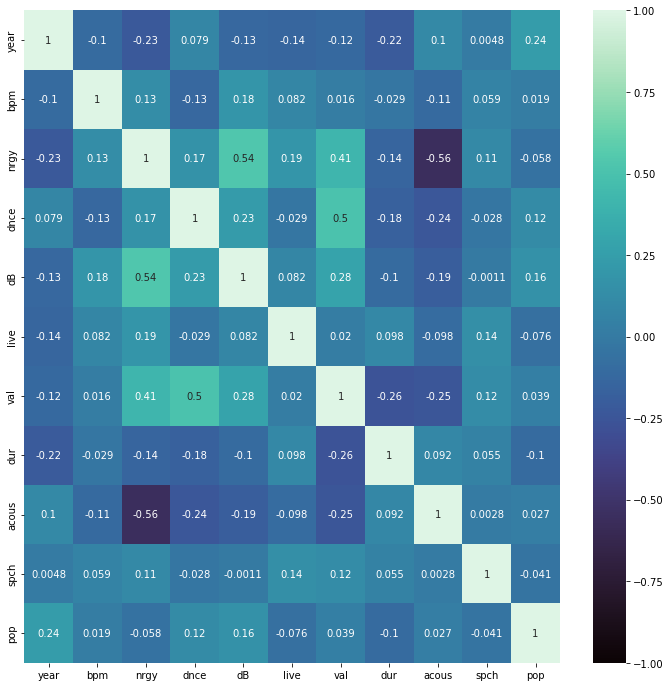

In [46]:
fig = plt.figure(figsize =(12, 12))
sns.heatmap(top10.corr(), vmin=-1, vmax=1, annot=True, cmap='mako')

Correlation matrix shows year, dance and decibels have the highest correlation to popularity. However, we must not make the logical fallacy to conclude that correlation means causation. This data simply illustrates a relationship between these factors and popularity. Then, we have many metrics that show a negative correlation ot popularity. The key metric with such a relationship includes the duration of the song. Other negatively correlated metrics show minimal significance. We can also see the correlations between the metrics, with the other metrics, yet our key target is popularity.  

In [48]:
# number of unique artists 
top10.artist.nunique()

184

In [49]:
# genres in top 10
top10.genre.unique()

array(['neo mellow', 'detroit hip hop', 'dance pop', 'pop',
       'canadian pop', 'hip pop', 'barbadian pop', 'atl hip hop',
       'australian pop', 'indie pop', 'art pop', 'colombian pop',
       'big room', 'british soul', 'chicago rap', 'acoustic pop',
       'permanent wave', 'boy band', 'baroque pop', 'celtic rock',
       'electro', 'complextro', 'canadian hip hop', 'candy pop',
       'alaska indie', 'folk-pop', 'metropopolis', 'house',
       'australian hip hop', 'electropop', 'australian dance',
       'hollywood', 'canadian contemporary r&b',
       'irish singer-songwriter', 'tropical house', 'belgian edm',
       'french indie pop', 'hip hop', 'danish pop', 'latin',
       'canadian latin', 'electronic trap', 'edm', 'electro house',
       'downtempo', 'brostep', 'contemporary country', 'moroccan pop',
       'escape room', 'alternative r&b'], dtype=object)

In [50]:
# most popular 5 songs of dataset
top10.sort_values(by='pop', ascending=False).head()

title         artist         genre  year  bpm  nrgy  dnce  \
572             Memories       Maroon 5           pop  2019   91    32    76   
573  Lose You To Love Me   Selena Gomez     dance pop  2019  102    34    51   
574    Someone You Loved  Lewis Capaldi           pop  2019  110    41    50   
575             Señorita   Shawn Mendes  canadian pop  2019  117    54    76   
576    How Do You Sleep?      Sam Smith           pop  2019  111    68    48   

     dB  live  val  dur  acous  spch  pop  
572  -7     8   57  189     84     5   99  
573  -9    21    9  206     58     4   97  
574  -6    11   45  182     75     3   96  
575  -6     9   75  191      4     3   95  
576  -5     8   35  202     15     9   93

The most popular 5 songs of the dataset are from 2019. The genres are various types of pop music. 

In [51]:
# songs above 90 popularity
top10.query('pop > 90')

title         artist  \
572                                           Memories       Maroon 5   
573                                Lose You To Love Me   Selena Gomez   
574                                  Someone You Loved  Lewis Capaldi   
575                                           Señorita   Shawn Mendes   
576                                  How Do You Sleep?      Sam Smith   
577  South of the Border (feat. Camila Cabello & Ca...     Ed Sheeran   
578                             Trampoline (with ZAYN)          SHAED   

            genre  year  bpm  nrgy  dnce  dB  live  val  dur  acous  spch  pop  
572           pop  2019   91    32    76  -7     8   57  189     84     5   99  
573     dance pop  2019  102    34    51  -9    21    9  206     58     4   97  
574           pop  2019  110    41    50  -6    11   45  182     75     3   96  
575  canadian pop  2019  117    54    76  -6     9   75  191      4     3   95  
576           pop  2019  111    68    48  -5     8   35  202     15     9   93  
577           pop  2019   98    62    86  -6     9   67  204     15     8   92  
578    electropop  2019  127    46    62  -6    14   50  184     56     3   92

The only songs that have a popularity score above 90 are all from 2019. They are also various genres of pop music. 

In [52]:
# songs above 85 popularity
top10.query('pop > 85').sort_values(by='pop', ascending=False)

title            artist  \
572                                           Memories          Maroon 5   
573                                Lose You To Love Me      Selena Gomez   
574                                  Someone You Loved     Lewis Capaldi   
575                                           Señorita      Shawn Mendes   
576                                  How Do You Sleep?         Sam Smith   
577  South of the Border (feat. Camila Cabello & Ca...        Ed Sheeran   
578                             Trampoline (with ZAYN)             SHAED   
581         Good as Hell (feat. Ariana Grande) - Remix             Lizzo   
580                                        Truth Hurts             Lizzo   
579                                            Happier        Marshmello   
582                                        Higher Love              Kygo   
139                                Underneath the Tree    Kelly Clarkson   
443                                       Shape of You        Ed Sheeran   
583                                         Only Human    Jonas Brothers   
210                                          All of Me       John Legend   
508                           One Kiss (with Dua Lipa)     Calvin Harris   
444                                             Closer  The Chainsmokers   
584                    Beautiful People (feat. Khalid)        Ed Sheeran   
585                                             Sucker    Jonas Brothers   
586                                   Don't Call Me Up             Mabel   

            genre  year  bpm  nrgy  dnce  dB  live  val  dur  acous  spch  pop  
572           pop  2019   91    32    76  -7     8   57  189     84     5   99  
573     dance pop  2019  102    34    51  -9    21    9  206     58     4   97  
574           pop  2019  110    41    50  -6    11   45  182     75     3   96  
575  canadian pop  2019  117    54    76  -6     9   75  191      4     3   95  
576           pop  2019  111    68    48  -5     8   35  202     15     9   93  
577           pop  2019   98    62    86  -6     9   67  204     15     8   92  
578    electropop  2019  127    46    62  -6    14   50  184     56     3   92  
581   escape room  2019   96    89    67  -3    74   48  159     30     6   90  
580   escape room  2019  158    62    72  -3    12   41  173     11    11   90  
579       brostep  2019  100    79    69  -3    17   67  214     19     5   90  
582           edm  2019  104    68    69  -7    10   40  228      2     3   88  
139     dance pop  2013  160    81    51  -5    21   69  230      0     5   88  
443           pop  2017   96    65    83  -3     9   93  234     58     8   87  
583      boy band  2019   94    50    80  -6     6   87  183     11     7   87  
210    neo mellow  2014  120    26    42  -7    13   33  270     92     3   86  
508     dance pop  2018  124    86    79  -3     8   59  215      4    11   86  
444    electropop  2017   95    52    75  -6    11   66  245     41     3   86  
584           pop  2019   93    65    64  -8     8   55  198     12    19   86  
585      boy band  2019  138    73    84  -5    11   95  181      4     6   86  
586     dance pop  2019   99    88    67  -3     8   23  178     30    15   86

### Popularity Differences by Year

In [54]:
# mean popularity for each year
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
for i in years:
    means = top10[top10['year']== i]['pop'].mean()
    print(str(i) + '  :  ' + str(means))

2010  :  64.25490196078431
2011  :  61.867924528301884
2012  :  67.77142857142857
2013  :  63.985915492957744
2014  :  62.706896551724135
2015  :  64.56842105263158
2016  :  64.1625
2017  :  69.01538461538462
2018  :  72.4375
2019  :  84.35483870967742


In [55]:
# lists of popularity's of the various years
yr_2019 = top10[top10.year == 2019]['pop'].to_list()
yr_2018 = top10[top10.year == 2018]['pop'].to_list()
yr_2017 = top10[top10.year == 2017]['pop'].to_list()
yr_2016 = top10[top10.year == 2016]['pop'].to_list()
yr_2015 = top10[top10.year == 2015]['pop'].to_list()
yr_2014 = top10[top10.year == 2014]['pop'].to_list()
yr_2013 = top10[top10.year == 2013]['pop'].to_list()
yr_2012 = top10[top10.year == 2012]['pop'].to_list()
yr_2011 = top10[top10.year == 2011]['pop'].to_list()
yr_2010 = top10[top10.year == 2010]['pop'].to_list()

#### Null Hypothesis


The means of the 2019 and the other years are the same?

In [56]:
# 2019 and 2018
alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(yr_2019, yr_2018)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis, the popularity means of the 2019 and 2018 are different")
else:
    print("We can't reject the null hypothesis")

p-value:  9.08140589747621e-08
We reject the null hypothesis, the popularity means of the 2019 and 2018 are different


In [57]:
# 2019 and 2017
alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(yr_2019, yr_2017)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis, the popularity means of the 2019 and 2017 are different")
else:
    print("We can't reject the null hypothesis")

p-value:  6.31211007525009e-10
We reject the null hypothesis, the popularity means of the 2019 and 2017 are different


In [58]:
# 2019 and 2016
alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(yr_2019, yr_2016)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis, the popularity means of the 2019 and 2016 are different")
else:
    print("We can't reject the null hypothesis")

p-value:  1.6466011433742306e-09
We reject the null hypothesis, the popularity means of the 2019 and 2016 are different


In [59]:
# 2019 and 2015
alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(yr_2019, yr_2015)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis, the popularity means of the 2019 and 2015 are different")
else:
    print("We can't reject the null hypothesis")

p-value:  3.411716576167158e-11
We reject the null hypothesis, the popularity means of the 2019 and 2015 are different


In [60]:
# 2019 and 2014
alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(yr_2019, yr_2014)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis, the popularity means of the 2019 and 2014 are different")
else:
    print("We can't reject the null hypothesis")

p-value:  1.9202416636017074e-10
We reject the null hypothesis, the popularity means of the 2019 and 2014 are different


In [61]:
# 2019 and 2013
alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(yr_2019, yr_2013)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis, the popularity means of the 2019 and 2013 are different")
else:
    print("We can't reject the null hypothesis")

p-value:  1.3900754415255492e-12
We reject the null hypothesis, the popularity means of the 2019 and 2013 are different


In [62]:
# 2019 and 2012
alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(yr_2019, yr_2012)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis, the popularity means of the 2019 and 2012 are different")
else:
    print("We can't reject the null hypothesis")

p-value:  4.904997717800578e-07
We reject the null hypothesis, the popularity means of the 2019 and 2012 are different


In [63]:
# 2019 and 2011
alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(yr_2019, yr_2011)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis, the popularity means of the 2019 and 2011 are different")
else:
    print("We can't reject the null hypothesis")

p-value:  2.1903598698159695e-10
We reject the null hypothesis, the popularity means of the 2019 and 2011 are different


In [64]:
# 2019 and 2010
alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(yr_2019, yr_2010)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis, the popularity means of the 2019 and 2010 are different")
else:
    print("We can't reject the null hypothesis")

p-value:  5.064237674160785e-11
We reject the null hypothesis, the popularity means of the 2019 and 2010 are different


Widening the filter to a minimum popularity score of 85, we start to see songs from other years. It appears that the songs from 2019 are generally more popular than songs from other years. Furthermore, the average popularity of the songs in 2019 are greater than that of the other years. Statistical testing proves that the mean of 2019 is different than the means of the other years. This illustrates whey we see a positive correlation between year and popularity. 

In [65]:
# Artist Popularity Based on Year
px.histogram(top10, y='pop', x='artist', color='year', title='Artist Popularity Based on Year', template='plotly_dark', labels={'pop': 'Popularity', 'artist': 'Artist'})

Here, we see the popularity ratings of artists across the years 2010 to 2019. We can filter the figure by year, to see new artists that appear in the top 10, as well as artists that remain from previous years. Since the metric is the sum of popularity, all the songs of an artist, in that particular year, are considered. Therefore, an artist with more songs can sometimes beat an artist with a higher popularity rating, all dependant on the total popularity score. Better comparisons can be made when isolating the individual years from the dataset, or another view, by comparing the mean popularity scores.

In [67]:
# artist, year, popularity pivot
artist_pivot = pd.pivot_table(top10, index='artist', columns='year', values='pop', aggfunc='mean')
artist_pivot

year                 2010  2011  2012  2013  2014  2015  2016  2017  2018  \
artist                                                                      
3OH!3                62.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5 Seconds of Summer   NaN   NaN   NaN   NaN  71.0   NaN   NaN   NaN   NaN   
A Great Big World     NaN   NaN   NaN   NaN  61.0   NaN   NaN   NaN   NaN   
Adam Lambert         62.5   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Adele                 NaN  78.0  76.0   NaN   NaN  73.0  47.5  60.0   NaN   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
ZAYN                  NaN   NaN   NaN   NaN   NaN   NaN  65.5  78.0  77.5   
Zara Larsson          NaN   NaN   NaN   NaN   NaN  77.0   NaN   NaN   NaN   
Zedd                  NaN   NaN   NaN  75.0  64.0  68.0  51.0  73.0   NaN   
fun.                  NaN   NaN  67.5   NaN   NaN   NaN   NaN   NaN   NaN   
will.i.am             NaN   NaN   NaN  68.0   NaN   NaN   NaN   NaN   NaN   

year                 2019  
artist                     
3OH!3                 NaN  
5 Seconds of Summer   NaN  
A Great Big World     NaN  
Adam Lambert          NaN  
Adele                 NaN  
...                   ...  
ZAYN                  NaN  
Zara Larsson          NaN  
Zedd                  NaN  
fun.                  NaN  
will.i.am             NaN  

[184 rows x 10 columns]

In [68]:
# popularity by year interactive
px.scatter(artist_pivot, animation_frame='year', title='Artist Mean Popularity by Year', height=700, template='plotly_dark', color_discrete_sequence=['green'], labels={'value': 'Mean Popularity', 'artist': 'Artist'})

By comparing mean instead of total popularity scores, we are able to account for artists with more representation in the dataset for a particular year. Now, we can truly visualize the differences in artist popularity over the years. Consequently, artists need to have somewhat of consistency in high scores, as a song that makes the list, that is not very popular, can lower the respective artists ratings. 

In [70]:
# Most popular artists of N year
year = top10.year.unique()
for i in year:
    yr = top10[top10.year.isin([i])]
    px.histogram(yr, y='pop', x='artist', title='Most Popular Artists of ' + str(i), height=800, template='plotly_dark', color_discrete_sequence=['green'], labels={'pop': 'Popularity', 'artist': 'Artist'}).show()


Now, filtering by year, we are able to clearly see the top artists of the various periods. Once again, we are dealing with totals, therefore we see the artists with more songs from a particular year in the dataset have higher popularity scores. This is intuitive to what we want to see, a sum of popularity rather than a comparison of means, as an artist with multiple hits may garner more popularity than an artist with one hit in the year. Some artists appear to have a breakout year, where they have multiple hit songs. It would stand to reason that Many of these artists have won some type of award or topped multiple music charts. Our research further supports this claim.

In [71]:
# top 10 titles of each year, sorted by pop
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
for i in years:
    display(top10[top10['year']== i].sort_values(by='pop', ascending=False).nlargest(10, columns='pop'))

title         artist  \
0                             Hey, Soul Sister          Train   
1                         Love The Way You Lie         Eminem   
2                                      TiK ToK          Kesha   
3                                  Bad Romance      Lady Gaga   
4                         Just the Way You Are     Bruno Mars   
5                                         Baby  Justin Bieber   
6                                     Dynamite      Taio Cruz   
7                                      Secrets    OneRepublic   
8   Empire State of Mind (Part II) Broken Down    Alicia Keys   
11                                   Marry You     Bruno Mars   

              genre  year  bpm  nrgy  dnce  dB  live  val  dur  acous  spch  \
0        neo mellow  2010   97    89    67  -4     8   80  217     19     4   
1   detroit hip hop  2010   87    93    75  -5    52   64  263     24    23   
2         dance pop  2010  120    84    76  -3    29   71  200     10    14   
3         dance pop  2010  119    92    70  -4     8   71  295      0     4   
4               pop  2010  109    84    64  -5     9   43  221      2     4   
5      canadian pop  2010   65    86    73  -5    11   54  214      4    14   
6         dance pop  2010  120    78    75  -4     4   82  203      0     9   
7         dance pop  2010  148    76    52  -6    12   38  225      7     4   
8           hip pop  2010   93    37    48  -8    12   14  216     74     3   
11              pop  2010  145    83    62  -5    10   48  230     33     4   

    pop  
0    83  
1    82  
2    80  
3    79  
4    78  
5    77  
6    77  
7    77  
8    76  
11   73

title           artist  \
51                                   A Thousand Years  Christina Perri   
52                                   Someone Like You            Adele   
53                                 Give Me Everything          Pitbull   
54                               Just the Way You Are       Bruno Mars   
55                                Rolling in the Deep            Adele   
56                              Run the World (Girls)          Beyoncé   
57  Moves Like Jagger - Studio Recording From The ...         Maroon 5   
58                                        Love On Top          Beyoncé   
59                                            Grenade       Bruno Mars   
60                                    Tonight Tonight   Hot Chelle Rae   

           genre  year  bpm  nrgy  dnce  dB  live  val  dur  acous  spch  pop  
51     dance pop  2011  139    41    42  -7    11   16  285     31     3   81  
52  british soul  2011  135    33    56  -8    10   28  285     89     3   80  
53     dance pop  2011  129    94    67  -3    30   53  252     19    16   79  
54           pop  2011  109    84    64  -5     9   43  221      2     4   78  
55  british soul  2011  105    76    73  -5     5   52  228     13     3   76  
56     dance pop  2011  127    90    73  -4    37   76  236      0    14   76  
57           pop  2011  128    76    72  -4    32   62  201      1     5   76  
58     dance pop  2011   94    75    65  -5    60   65  267      8     9   76  
59           pop  2011  110    56    71  -7    12   23  223     15     6   75  
60     dance pop  2011  100    78    69  -5    16   81  200      8    12   75

title                    artist  \
104                     Titanium (feat. Sia)              David Guetta   
105                     Locked Out of Heaven                Bruno Mars   
106                                 Paradise                  Coldplay   
107                                 Payphone                  Maroon 5   
108                 What Makes You Beautiful             One Direction   
109                 I Knew You Were Trouble.              Taylor Swift   
110                            Call Me Maybe          Carly Rae Jepsen   
111                Love You Like A Love Song  Selena Gomez & The Scene   
112                     Set Fire to the Rain                     Adele   
113  We Are Never Ever Getting Back Together              Taylor Swift   

              genre  year  bpm  nrgy  dnce  dB  live  val  dur  acous  spch  \
104       dance pop  2012  126    79    60  -4    13   30  245      7    10   
105             pop  2012  144    70    73  -4    31   87  233      5     4   
106  permanent wave  2012  140    59    45  -7     8   20  279      5     3   
107             pop  2012  110    75    74  -5    29   55  231      2     4   
108        boy band  2012  125    79    73  -2     6   89  200      1     7   
109             pop  2012   77    47    62  -7     3   68  220      0     4   
110    canadian pop  2012  120    58    78  -7    11   66  193      1     4   
111       dance pop  2012  117    68    86  -4     7   92  188      8     5   
112    british soul  2012  108    68    61  -4    13   47  242      0     3   
113             pop  2012   86    68    63  -6    12   75  193      1     9   

     pop  
104   80  
105   79  
106   79  
107   79  
108   78  
109   77  
110   76  
111   76  
112   76  
113   75

title               artist  \
139                                Underneath the Tree       Kelly Clarkson   
140                                         Wake Me Up               Avicii   
141                                   Story of My Life        One Direction   
142           Just Give Me a Reason (feat. Nate Ruess)                 P!nk   
143                                       Hall of Fame           The Script   
144                                               Roar           Katy Perry   
145                                      We Can't Stop          Miley Cyrus   
146                 Don't You Worry Child - Radio Edit  Swedish House Mafia   
147  Get Lucky (feat. Pharrell Williams & Nile Rodg...            Daft Punk   
148                                      Wrecking Ball          Miley Cyrus   

           genre  year  bpm  nrgy  dnce  dB  live  val  dur  acous  spch  pop  
139    dance pop  2013  160    81    51  -5    21   69  230      0     5   88  
140     big room  2013  124    78    53  -6    16   64  247      0     5   85  
141     boy band  2013  121    66    60  -6    12   29  245     23     5   81  
142    dance pop  2013   95    55    78  -7    13   44  243     35     5   81  
143  celtic rock  2013   85    87    42  -4    12   63  203      7     6   80  
144    dance pop  2013  180    77    55  -5    35   46  224      0     4   78  
145    dance pop  2013   80    62    61  -6    37   48  231      1     3   78  
146     big room  2013  129    84    61  -3    12   44  213     11     5   78  
147      electro  2013  116    81    79  -9    10   86  248      4     4   77  
148    dance pop  2013  120    42    53  -6    11   35  221     41     3   77

title             artist       genre  year  bpm  \
210                       All of Me        John Legend  neo mellow  2014  120   
211                    Stay With Me          Sam Smith         pop  2014   84   
212                          Summer      Calvin Harris   dance pop  2014  128   
213  Happy - From "Despicable Me 2"  Pharrell Williams   dance pop  2014  160   
214                            Rude             MAGIC!         pop  2014  144   
215                    Shake It Off       Taylor Swift         pop  2014  160   
216                      Dark Horse         Katy Perry   dance pop  2014  132   
217                     Hey Brother             Avicii    big room  2014  125   
218                            Maps           Maroon 5         pop  2014  120   
219                        Treasure         Bruno Mars         pop  2014  116   

     nrgy  dnce  dB  live  val  dur  acous  spch  pop  
210    26    42  -7    13   33  270     92     3   86  
211    42    42  -6    11   18  173     59     4   85  
212    86    60  -4    14   74  223      2     3   80  
213    82    65  -5     9   96  233     22    18   79  
214    76    77  -5    31   93  225      4     4   79  
215    80    65  -5    33   94  219      6    17   78  
216    59    65  -6    17   35  216      0     5   78  
217    78    55  -5     8   46  255      3     4   78  
218    71    74  -6     6   88  190      2     3   78  
219    69    87  -5    32   94  179      4     4   77

title          artist  \
268                                  Thinking out Loud      Ed Sheeran   
270                                          The Hills      The Weeknd   
269                               I'm Not The Only One       Sam Smith   
271                                      Love Yourself   Justin Bieber   
272                                        Uptown Funk     Mark Ronson   
273                                  Take Me To Church          Hozier   
275                                              Sorry   Justin Bieber   
274                                              Sugar        Maroon 5   
276                                    FourFiveSeconds         Rihanna   
277  Love Me Like You Do - From "Fifty Shades Of Grey"  Ellie Goulding   

                         genre  year  bpm  nrgy  dnce  dB  live  val  dur  \
268                        pop  2015   79    45    78  -6    18   59  282   
270  canadian contemporary r&b  2015  113    56    58  -7    14   14  242   
269                        pop  2015   82    49    68  -6     8   49  239   
271               canadian pop  2015  100    38    61 -10    28   52  234   
272                  dance pop  2015  115    61    86  -7     3   93  270   
273    irish singer-songwriter  2015  129    66    57  -5    12   44  242   
275               canadian pop  2015  100    76    65  -4    30   41  201   
274                        pop  2015  120    79    75  -7     9   88  235   
276              barbadian pop  2015  206    27    58  -6    13   35  188   
277                  dance pop  2015  190    61    26  -7    13   28  253   

     acous  spch  pop  
268     47     3   84  
270      7     5   84  
269     53     4   84  
271     84    44   83  
272      1     8   82  
273     63     5   81  
275      8     5   81  
274      6     3   81  
276     88     5   80  
277     25     5   79

title            artist                      genre  \
363                  The Hills        The Weeknd  canadian contemporary r&b   
364              Love Yourself     Justin Bieber               canadian pop   
365          Cake By The Ocean              DNCE                  dance pop   
366          Don't Let Me Down  The Chainsmokers                 electropop   
367        In the Name of Love     Martin Garrix                   big room   
368                   Into You     Ariana Grande                  dance pop   
369  This Is What You Came For     Calvin Harris                  dance pop   
370            Million Reasons         Lady Gaga                  dance pop   
371                  Needed Me           Rihanna              barbadian pop   
372                    7 Years      Lukas Graham                 danish pop   

     year  bpm  nrgy  dnce  dB  live  val  dur  acous  spch  pop  
363  2016  113    56    58  -7    14   14  242      7     5   84  
364  2016  100    38    61 -10    28   52  234     84    44   83  
365  2016  119    75    77  -5     4   90  219     15     5   81  
366  2016  160    87    53  -5    14   42  208     16    17   81  
367  2016  134    52    50  -6    45   17  196     11     4   81  
368  2016  108    73    62  -6    14   37  244      2    11   80  
369  2016  124    93    63  -3    15   47  222     20     3   80  
370  2016  130    42    67  -8    11   15  205     49     4   80  
371  2016  111    31    67  -8     8   30  192     11    24   80  
372  2016  120    47    77  -6    39   34  237     29     5   80

title            artist                      genre  year  \
443        Shape of You        Ed Sheeran                        pop  2017   
444              Closer  The Chainsmokers                 electropop  2017   
445             Starboy        The Weeknd  canadian contemporary r&b  2017   
446    Treat You Better      Shawn Mendes               canadian pop  2017   
447  That's What I Like        Bruno Mars                        pop  2017   
448     Let Me Love You          DJ Snake            electronic trap  2017   
449    I Feel It Coming        The Weeknd  canadian contemporary r&b  2017   
450               Mercy      Shawn Mendes               canadian pop  2017   
451        Side To Side     Ariana Grande                  dance pop  2017   
452                Stay              Zedd                 complextro  2017   

     bpm  nrgy  dnce  dB  live  val  dur  acous  spch  pop  
443   96    65    83  -3     9   93  234     58     8   87  
444   95    52    75  -6    11   66  245     41     3   86  
445  186    59    68  -7    14   49  230     14    28   85  
446   83    82    44  -4    11   75  188     11    34   84  
447  134    56    85  -5     9   86  207      1     4   83  
448  100    72    65  -5    14   16  206      9     3   82  
449   93    82    77  -6     7   59  269     43    12   81  
450  148    66    56  -5    11   36  209     13     8   81  
451  159    74    65  -6    24   61  226      5    23   80  
452  102    62    69  -5    12   54  210     25     6   80

title          artist         genre  year  bpm  \
508         One Kiss (with Dua Lipa)   Calvin Harris     dance pop  2018  124   
510                        I Like It         Cardi B           pop  2018  136   
509        Havana (feat. Young Thug)  Camila Cabello     dance pop  2018  105   
511                        New Rules        Dua Lipa     dance pop  2018  116   
513             no tears left to cry   Ariana Grande     dance pop  2018  122   
514                            IDGAF        Dua Lipa     dance pop  2018   97   
512  There's Nothing Holdin' Me Back    Shawn Mendes  canadian pop  2018  122   
515                      In My Blood    Shawn Mendes  canadian pop  2018  140   
516                           Wolves    Selena Gomez     dance pop  2018  125   
517      Dusk Till Dawn - Radio Edit            ZAYN     dance pop  2018  180   

     nrgy  dnce  dB  live  val  dur  acous  spch  pop  
508    86    79  -3     8   59  215      4    11   86  
510    73    82  -4    37   65  253     10    13   85  
509    52    77  -4    13   39  217     18     3   85  
511    70    76  -6    15   61  209      0     7   84  
513    71    70  -6    29   35  206      4     6   84  
514    54    84  -6     8   51  218      4     9   84  
512    81    87  -4     8   97  199     38     6   84  
515    71    62  -7    13   49  211      6     7   83  
516    80    72  -5    20   31  198     12     4   83  
517    44    26  -7    11   10  239     10     4   83

title         artist  \
572                                           Memories       Maroon 5   
573                                Lose You To Love Me   Selena Gomez   
574                                  Someone You Loved  Lewis Capaldi   
575                                           Señorita   Shawn Mendes   
576                                  How Do You Sleep?      Sam Smith   
577  South of the Border (feat. Camila Cabello & Ca...     Ed Sheeran   
578                             Trampoline (with ZAYN)          SHAED   
579                                            Happier     Marshmello   
580                                        Truth Hurts          Lizzo   
581         Good as Hell (feat. Ariana Grande) - Remix          Lizzo   

            genre  year  bpm  nrgy  dnce  dB  live  val  dur  acous  spch  pop  
572           pop  2019   91    32    76  -7     8   57  189     84     5   99  
573     dance pop  2019  102    34    51  -9    21    9  206     58     4   97  
574           pop  2019  110    41    50  -6    11   45  182     75     3   96  
575  canadian pop  2019  117    54    76  -6     9   75  191      4     3   95  
576           pop  2019  111    68    48  -5     8   35  202     15     9   93  
577           pop  2019   98    62    86  -6     9   67  204     15     8   92  
578    electropop  2019  127    46    62  -6    14   50  184     56     3   92  
579       brostep  2019  100    79    69  -3    17   67  214     19     5   90  
580   escape room  2019  158    62    72  -3    12   41  173     11    11   90  
581   escape room  2019   96    89    67  -3    74   48  159     30     6   90

Need these tables to match figures below to get the artist and other information. 

In [72]:
# Most popular artists of N year
year = top10.year.unique()
for i in year:
    yr = top10[top10.year.isin([i])].nlargest(10, columns='pop')
    px.histogram(yr, y='pop', x='title', title='Most Popular Songs of ' + str(i), height=800, template='plotly_dark', color_discrete_sequence=['green'], labels={'pop': 'Popularity', 'title': 'Song Titles'}).show()

Here, we compare the popularity, within the various time frames, of the various songs. These songs correspond to the top artists of each year, and some artists are represented more than others, with multiple songs on each list. The popularity values are relatively close to one another, given the same year. It would not be a stretch to assume these songs have topped music charts, or have lead to their respective artists winning a music award. Our research further supports this claim. 

In [73]:
# Top N artists of the Decade
number = [5, 10, 20, 50, 100]

for n in number:
    top_artist = top10.artist.value_counts().nlargest(n)
    px.bar(top_artist, title='Top ' + str(n) +  ' Artists of the Decade', height=600, template='plotly_dark', color_discrete_sequence=['green'], labels={'index': 'Artists', 'value': 'Number of Songs'}).show()
    

These artists are the top artists of the decade, in the sense that they have the most songs that made the top 10 list. Looking at the top 5, we see Katy perry, Justin Bieber, Rihanna, Maroon 5 and Lady Gaga. When lengthening the number of artists, we can see the scale at which the top five are more popular than the rest. Looking across the years, we see many of these artists appear multiple times in a particular year, and multiple times across a year. 

In [74]:
# Top N genres of the decade
number = [5, 10, 15, 20, 50]

for n in number:
    top_genre = top10.genre.value_counts().nlargest(n)
    px.bar(top_genre, title='Top ' + str(n) +  ' Genres of the Decade', height=600, template='plotly_dark', color_discrete_sequence=['green'], labels={'index': 'Genres', 'value': 'Number of Songs'}).show()

Overall, we see that the various genres of pop, but most importantly dance pop, dominates the other genres of music. The magnitude of dance pop's popularity dwarfs the other genres, looking beyond the next 3 genres. We did not want to collapse the different pop genres into one pop genre, as well as the other genres, as the story of the data would change. Furthermore, we recognize the differences between dance pop and the other genres of pop. 

In [75]:
# most popular songs of the decade
top_titles_decade = top10.sort_values('title', ascending=False).nlargest(10, columns='pop')
top_titles_decade

title         artist  \
572                                           Memories       Maroon 5   
573                                Lose You To Love Me   Selena Gomez   
574                                  Someone You Loved  Lewis Capaldi   
575                                           Señorita   Shawn Mendes   
576                                  How Do You Sleep?      Sam Smith   
578                             Trampoline (with ZAYN)          SHAED   
577  South of the Border (feat. Camila Cabello & Ca...     Ed Sheeran   
580                                        Truth Hurts          Lizzo   
579                                            Happier     Marshmello   
581         Good as Hell (feat. Ariana Grande) - Remix          Lizzo   

            genre  year  bpm  nrgy  dnce  dB  live  val  dur  acous  spch  pop  
572           pop  2019   91    32    76  -7     8   57  189     84     5   99  
573     dance pop  2019  102    34    51  -9    21    9  206     58     4   97  
574           pop  2019  110    41    50  -6    11   45  182     75     3   96  
575  canadian pop  2019  117    54    76  -6     9   75  191      4     3   95  
576           pop  2019  111    68    48  -5     8   35  202     15     9   93  
578    electropop  2019  127    46    62  -6    14   50  184     56     3   92  
577           pop  2019   98    62    86  -6     9   67  204     15     8   92  
580   escape room  2019  158    62    72  -3    12   41  173     11    11   90  
579       brostep  2019  100    79    69  -3    17   67  214     19     5   90  
581   escape room  2019   96    89    67  -3    74   48  159     30     6   90

The most popular songs of the decade are all from 2019. This table is also the most popular songs of 2019. This is because the average popularity of songs in 2019 is higher than the averages of the other years. Furthermore, a popularity score of 90 is greater than the highest popularity score of any other year. 

In [76]:
# Years with most popular songs
top_year = top10.year.value_counts(sort=False)
px.bar(top_year, title='Years With Most Songs in Top 10 Dataset', height=600, template='plotly_dark', color_discrete_sequence=['green'], labels={'index': 'Year', 'value': 'Number of Songs'})

In [77]:
# mean number of songs for each release year in top 10 dataset
top_year.mean()

60.3

Although 2015 has the most number of songs on the top 10 dataset, the average popularity of songs in 2019 is still greater. This graph merely shows the amount of songs released in each year, that have made the top 10 criteria determined by Spotify. The year 2019 has the fewest amount of songs, at 31, which is far less than the mean across all years of 60.3. Only 5 of the 10 timeframes has a value above the mean: 2013, 2015, 2016, 2017 and 2018. 

In [78]:
# mask for filtering columns
top10.loc[:, 'bpm':'pop'].columns

Index(['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch',
       'pop'],
      dtype='object')

In [79]:
# top N category of the decade
category = top10.loc[:, 'bpm':'pop'].columns
for i in category:
    top_category = top10[i].value_counts()
    px.bar(top_category, title='Distribution of '+  str.upper(i) + ' Ratings of the Decade', height=600, template='plotly_dark', color_discrete_sequence=['green'], labels={'index': 'Rating', 'value': 'Value'}).show()

Here, we look at the distribution of each feature of the top 10 dataset. The values include the various columns: 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', and 'pop.' We assume, that the target, popularity, is developed with the use of the other features. In other words, popularity is a product of a songs bpm, energy, etc. We see how some features have a normal distribution, while others have a right or left skew. 

#### Boxplots

In [80]:
import matplotlib.pyplot as plt

In [81]:
top10.columns

Index(['title', 'artist', 'genre', 'year', 'bpm', 'nrgy', 'dnce', 'dB', 'live',
       'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')

bpm


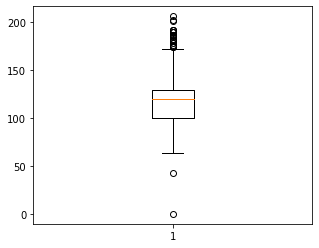

nrgy


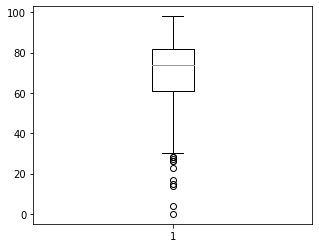

dnce


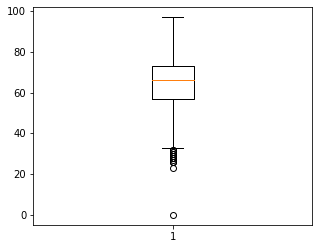

dB


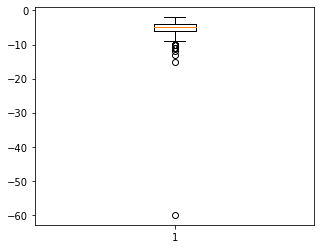

live


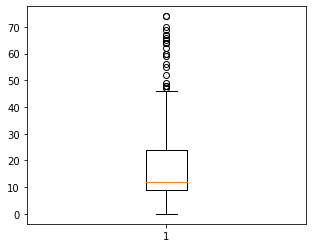

val


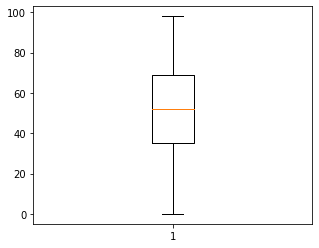

dur


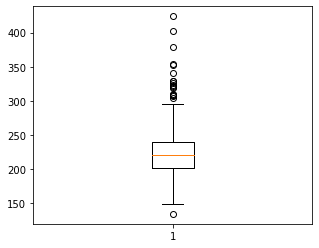

acous


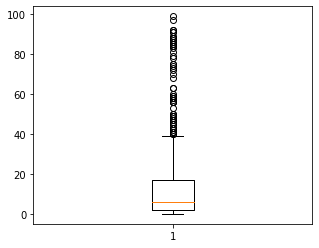

spch


pop


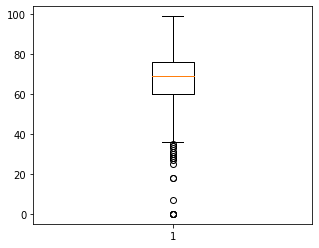

In [82]:
xlabels = ('bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop')
for i in xlabels:
    print(i)
    fig = plt.figure(figsize =(5, 4))
    plt.boxplot((
        top10[i]))
    plt.show()

Here using the boxplots we can start to identify outliers, we could use this to try and drop any outliers and see if we can improve the ML models.

There are a couple of interesting points to note like the song that is -60 db, this might be an entry error but it certainly would affect a ML model. 

### Top 10 Model

In [83]:
# machine learning libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse, r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

In [84]:
# encoding data, splitting features, target
encoder = OrdinalEncoder()
data_ordinal = pd.DataFrame(encoder.fit_transform(top10), columns=top10.columns)

features = data_ordinal.drop(['title', 'pop'], axis=1)
target = data_ordinal['pop']

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=19) # split 25% of data to make validation set

In [85]:
# scaling
numeric = ['year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])

In [86]:
# view of dataset
print(features_train.head())

     artist  genre      year       bpm      nrgy      dnce        dB  \
186    48.0   25.0 -0.597763  0.602921 -2.780995 -1.478067 -1.416788   
492   104.0   10.0  0.935223  0.233590 -0.398632  0.634936 -0.847554   
86     94.0   25.0 -1.364256  0.649088  1.106017 -0.270637  0.860148   
184    48.0   25.0 -0.597763 -1.012903  0.604468  0.182150  0.290914   
15    176.0    4.0 -1.747502  0.602921  0.290999  1.012258 -0.278320   

         live       val       dur     acous      spch  
186 -0.547575 -1.299179 -0.077676  3.492293 -0.599389  
492 -0.794420  0.036545 -1.949756 -0.651416 -0.599389  
86   2.250008 -0.631317  1.367437 -0.769808 -0.331015  
184 -0.547575 -0.764889 -0.865920 -0.237045 -0.599389  
15   1.509471 -0.853938  1.498811  0.414109 -0.733576  


In [87]:
# linear regression
model = LinearRegression() # initialize model constructor
model.fit(features_train, target_train) # train model on training set
predictions_valid = model.predict(features_valid) # get model predictions on validation set
result = r2_score(target_valid, predictions_valid)  # calculate R2 on validation set


print('R2 of the linear regression model on the validation set:', result)
print('RMSE of Linear Regression: ', mse(target_valid, predictions_valid) ** 0.5)

R2 of the linear regression model on the validation set: 0.11389334681574559
RMSE of Linear Regression:  11.91525579887254


In [88]:
# cross validation score
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, features, target, cv=5, scoring='r2') 
final_score = sum(scores) / len(scores)
print('Average model evaluation score:', final_score)

Average model evaluation score: -0.09564419885016177


In [89]:
# Random forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

best_model = None
best_result = 10000
best_est = 0
best_depth = 0
for est in range(10, 51, 10):
    for depth in range (1, 11): # choose hyperparameter range
        model2 = RandomForestRegressor(random_state=19, n_estimators=est, max_depth=depth)
        model2.fit(features_train, target_train) # train model on training set
        predictions_valid2 = model2.predict(features_valid) # get model predictions on validation set
        result2 = mean_squared_error(target_valid, predictions_valid2) ** 0.5 # calculate RMSE on validation set
        if result2 < best_result:
            best_model = model2
            best_result = result2
            best_est = est
            best_depth = depth
print('RMSE of the best model on the validation set:', best_result, 'n_estimators:', best_est, 'best_depth:', depth)

RMSE of the best model on the validation set: 11.638909926831106 n_estimators: 10 best_depth: 10


#### Logistic Regression

In [90]:
# logistic regression 

from sklearn.linear_model import LogisticRegression

# top10.loc[top10['pop'] > 85, 'pop_class'] = 1
# top10.loc[top10['pop'] <= 85, 'pop_class'] = 0

encoder = OrdinalEncoder()
data_ordinal = pd.DataFrame(encoder.fit_transform(top10), columns=top10.columns)

features = data_ordinal.drop(['title', 'pop'], axis=1)
target = data_ordinal['pop']

features_train, features_valid, target_train, target_valid = train_test_split(
            features, target, test_size=0.25, random_state=19)


scaler = StandardScaler()
scaler.fit(features_train[numeric])

numeric = ['year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch']

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])


model3 = LogisticRegression(random_state=19, solver='liblinear')
model3.fit(features_train, target_train)
score_train = model3.score(features_train, target_train)
score_valid = model3.score(features_valid, target_valid)


print('Accuracy of the logistic regression model on the training set:', score_train)

print('Accuracy of the logistic regression model on the validation set:', score_valid)


Accuracy of the logistic regression model on the training set: 0.17920353982300885
Accuracy of the logistic regression model on the validation set: 0.019867549668874173


#### Gradient Boosting

In [91]:
# Hist gradient boosting
from sklearn.ensemble import HistGradientBoostingRegressor

est = HistGradientBoostingRegressor(random_state=19).fit(features_train, target_train)
est.score(features_valid, target_valid)



0.09253921463108794

In [92]:
# gradient boosting
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=19)
reg.fit(features_train, target_train)

reg.score(features_valid, target_valid)


0.05448036155959923

Dataset too small for ML models, scores are pretty low

#### XGB

In [93]:
import xgboost as xgb
from IPython.display import clear_output

In [94]:
%%time
r2_top = 0
m_depth = 2
m_est = 100
m_rmse = 100000
# for i in range(1,36):
#     for xi in range(100, 1100, 100):
#         clear_output(wait=True)
#         print('depth:', i)
#         print('estimators:', xi)
#         print('best r2:', r2_top)
#         print('best rmse:', m_rmse)
#         model = xgb.XGBRegressor(objective='reg:squarederror',
#                                  max_depth=i,
#                                  n_estimators=xi,
#                                  colsample_bytree=0.5,
#                                  learning_rate=0.1,
#                                  subsample=0.6,
#                                  random_state=12345
#                                 )
#         model.fit(features_train, target_train)
#         predictions_train = model.predict(features_train)
#         predictions_valid = model.predict(features_valid)
#         y = model.score(features_valid, target_valid)
#         result = mean_squared_error(target_valid, predictions_valid)**0.5
#         if result < m_rmse:
#             m_rmse = result
#             r2_top = y
#             m_depth = i
#             m_est = xi    

clear_output(wait=True)        
print(f'depth {m_depth}')
print(f'est {m_est}')
print(r2_top)
print(m_rmse)
model = xgb.XGBRegressor(objective='reg:squarederror',
                                 max_depth=m_depth,
                                 n_estimators=m_est,
                                 colsample_bytree=0.5,
                                 learning_rate=0.1,
                                 subsample=0.6,
                                 random_state=12345
                                )

model.fit(features_train, target_train)
predictions_train = model.predict(features_train)
predictions_valid = model.predict(features_valid)
y = model.score(features_valid, target_valid)
result = mean_squared_error(target_valid, predictions_valid)**0.5
print("Score of the XGB model on the validation set:\n", y)
print("RMSE of the XGB model on the validation set:\n", result)

depth 2
est 100
0
100000
Score of the XGB model on the validation set:
 0.1418476059324777
RMSE of the XGB model on the validation set:
 11.725802656631123
CPU times: total: 406 ms
Wall time: 164 ms


*************

### Unpopular dataset

In [95]:
# unpopular dataset
url3 = 'https://raw.githubusercontent.com/dataPracticum/codepudding/main/spotify/unpopular_songs.csv'
unpopular = pd.read_csv(url3)
unpopular.drop('track_id', axis=1, inplace=True)
unpopular.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.530   0.770    4    -6.633     0       0.0389         0.284   
1         0.565   0.730    1    -6.063     1       0.0730         0.365   
2         0.427   0.546    4    -8.727     1       0.0849         0.539   
3         0.421   0.531    7    -5.516     1       0.0262         0.706   
4         0.537   0.804    8    -7.378     0       0.1570         0.379   

   instrumentalness  liveness  valence    tempo  duration_ms  explicit  \
0          0.501000     0.744    0.623  120.144       225696     False   
1          0.000000     0.237    0.511  130.026       158093     False   
2          0.015200     0.368    0.435   78.345       167262     False   
3          0.000208     0.110    0.383   85.080       236832     False   
4          0.000489     0.323    0.543  139.950       239400     False   

   popularity       track_name  track_artist  
0           2       No Regrets  James Reeder  
1           2        Wild Life  James Reeder  
2           2            Fangs  James Reeder  
3           2      Afterburner  James Reeder  
4           2  Hellfire Rising  James Reeder

In [157]:
unpopular.to_csv('unpopular.csv')

In [96]:
# Sumary of dataset
unpopular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10877 entries, 0 to 10876
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      10877 non-null  float64
 1   energy            10877 non-null  float64
 2   key               10877 non-null  int64  
 3   loudness          10877 non-null  float64
 4   mode              10877 non-null  int64  
 5   speechiness       10877 non-null  float64
 6   acousticness      10877 non-null  float64
 7   instrumentalness  10877 non-null  float64
 8   liveness          10877 non-null  float64
 9   valence           10877 non-null  float64
 10  tempo             10877 non-null  float64
 11  duration_ms       10877 non-null  int64  
 12  explicit          10877 non-null  bool   
 13  popularity        10877 non-null  int64  
 14  track_name        10877 non-null  object 
 15  track_artist      10877 non-null  object 
dtypes: bool(1), float64(9), int64(4), object

In [97]:
# Checking for missing values
unpopular.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
explicit            0
popularity          0
track_name          0
track_artist        0
dtype: int64

In [98]:
# description of the dataset with summary statistics
unpopular.describe()

danceability        energy           key      loudness          mode  \
count  10877.000000  10877.000000  10877.000000  10877.000000  10877.000000   
mean       0.572519      0.549771      5.223315    -11.359059      0.640986   
std        0.203501      0.257469      3.620319      6.788808      0.479733   
min        0.000000      0.000020      0.000000    -51.808000      0.000000   
25%        0.442000      0.379000      2.000000    -13.796000      0.000000   
50%        0.602000      0.569000      5.000000     -9.450000      1.000000   
75%        0.730000      0.745000      9.000000     -6.726000      1.000000   
max        0.986000      1.000000     11.000000      3.108000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  10877.000000  10877.000000      10877.000000  10877.000000   
mean       0.137965      0.354163          0.232943      0.212137   
std        0.160087      0.340914          0.369040      0.190303   
min        0.000000      0.000000          0.000000      0.000000   
25%        0.038400      0.036500          0.000000      0.099300   
50%        0.058900      0.233000          0.000133      0.129000   
75%        0.188000      0.657000          0.517000      0.268000   
max        0.962000      0.996000          1.000000      0.999000   

            valence         tempo   duration_ms    popularity  
count  10877.000000  10877.000000  1.087700e+04  10877.000000  
mean       0.464579    117.827552  2.055782e+05      3.078974  
std        0.273150     31.193596  1.067631e+05      4.007018  
min        0.000000      0.000000  4.693000e+03      0.000000  
25%        0.238000     92.996000  1.511520e+05      1.000000  
50%        0.468000    117.141000  1.975220e+05      2.000000  
75%        0.685000    138.934000  2.444280e+05      3.000000  
max        0.995000    239.500000  3.637277e+06     18.000000

In [99]:
# duplicates 
unpopular[['track_name', 'track_artist']].duplicated().sum()

35

In [100]:
# Looking at possible duplicates
unpopular[unpopular.duplicated(['track_name', 'track_artist'])].sort_values('track_artist')

danceability   energy  key  loudness  mode  speechiness  acousticness  \
5174        0.7010  0.88000   10    -5.044     1       0.0465      0.164000   
5177        0.5060  0.73500    8    -5.205     1       0.0347      0.336000   
6617        0.2760  0.40900    1    -7.092     1       0.0304      0.872000   
5550        0.7310  0.90000    0    -3.229     1       0.0329      0.317000   
5630        0.8280  0.63700    1    -9.750     0       0.2320      0.223000   
9679        0.1690  0.93100    2    -6.527     0       0.1070      0.006390   
9678        0.2630  0.92300    9    -6.004     1       0.0780      0.131000   
9677        0.3490  0.88900    4    -5.886     0       0.0681      0.007450   
9676        0.2030  0.94700    2    -6.450     1       0.1020      0.002960   
9675        0.1220  0.97400    9    -5.455     1       0.1210      0.000672   
9427        0.1590  0.56100    1   -21.891     1       0.0642      0.209000   
9431        0.2200  0.87300    8   -27.307     1       0.1060      0.371000   
9425        0.1710  0.72500    8   -30.982     1       0.0513      0.763000   
9422        0.1650  0.78200   11   -27.303     1       0.4590      0.812000   
9414        0.1410  0.41700    6   -24.707     0       0.0493      0.976000   
9415        0.2090  0.90500    1   -20.990     1       0.1030      0.288000   
9435        0.2090  0.96600    7   -23.566     1       0.0572      0.361000   
9430        0.1370  0.66700    7   -27.481     0       0.1090      0.018600   
9442        0.1280  0.46400    1   -31.245     1       0.5120      0.002180   
9441        0.0786  0.07260   10   -21.645     1       0.0508      0.064800   
9434        0.2660  0.85100    9   -26.821     1       0.0923      0.609000   
9418        0.1370  0.82700    0   -23.729     0       0.1070      0.018100   
9440        0.1560  1.00000    7   -20.650     1       0.0585      0.848000   
4479        0.5510  0.67700    2    -9.617     1       0.3060      0.163000   
9749        0.6950  0.85900    1    -3.989     1       0.2690      0.138000   
9744        0.7870  0.73700    1    -5.817     1       0.3190      0.354000   
9437        0.2050  0.00801    0   -23.200     1       0.0511      0.628000   
1909        0.7490  0.84300    1    -5.777     1       0.0441      0.132000   
1908        0.8350  0.81700    1    -6.685     1       0.1790      0.026700   
1903        0.9090  0.58000    8    -6.460     0       0.1910      0.044800   
6228        0.6600  0.28500    8   -20.353     1       0.0425      0.239000   
7196        0.4320  0.83400    6    -5.975     1       0.0866      0.003800   
9439        0.1060  0.00214    1   -21.715     1       0.0526      0.122000   
9428        0.1260  0.83000   11   -26.445     1       0.1520      0.885000   
9424        0.0822  0.42200    0   -34.124     0       0.4130      0.261000   

      instrumentalness  liveness  valence    tempo  duration_ms  explicit  \
5174          0.000282    0.0469  0.64000  122.008       259853     False   
5177          0.000000    0.0631  0.58000   83.976       177516     False   
6617          0.000000    0.4710  0.43400   82.597       274547     False   
5550          0.000274    0.0248  0.96600   94.418       227093     False   
5630          0.000000    0.0983  0.54000  105.155       204867      True   
9679          0.001490    0.6520  0.10400  142.091       351147     False   
9678          0.017000    0.9350  0.20900  131.511       282667     False   
9677          0.001540    0.9620  0.42100  129.385       281413     False   
9676          0.000059    0.9340  0.36600  104.347       220533     False   
9675          0.016700    0.9560  0.48100   84.512       279627     False   
9427          0.826000    0.8260  0.01510   86.498       182476     False   
9431          0.000044    0.9210  0.00678   55.617       214676     False   
9425          0.009500    0.3900  0.00001   85.895       216221     False   
9422          0.563000    0.5740  0.00877  173.363       215472     False   
9414  

The unpopular dataset has a similar structure to the top 10 dataset, but with a few different features. This dataset does not have any missing vales, and does not appear to have duplicates. We see Swishahouse has 3 songs named "Freestyle," yet the metrics associated with each song is different. This supports the theory that they are in fact different songs with the same name. 

In [102]:
# unpopular columns
unpopular.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'explicit', 'popularity', 'track_name', 'track_artist'],
      dtype='object')

In [103]:
# unpopular correlation matrix
unpopular.corr()

danceability    energy       key  loudness      mode  \
danceability          1.000000  0.103576  0.001416  0.384798 -0.042417   
energy                0.103576  1.000000  0.032848  0.668248 -0.043713   
key                   0.001416  0.032848  1.000000  0.020238 -0.174170   
loudness              0.384798  0.668248  0.020238  1.000000  0.007145   
mode                 -0.042417 -0.043713 -0.174170  0.007145  1.000000   
speechiness           0.288056  0.060659 -0.003339  0.067092 -0.087637   
acousticness         -0.253760 -0.578071 -0.017361 -0.491999  0.038880   
instrumentalness     -0.334578 -0.314757 -0.026367 -0.547323 -0.063921   
liveness             -0.250211  0.258379 -0.001745 -0.018979 -0.024145   
valence               0.517143  0.317266  0.015964  0.426773  0.000239   
tempo                 0.090058  0.171228 -0.003040  0.202228  0.017122   
duration_ms           0.000483  0.152014  0.006044  0.195281  0.035139   
explicit              0.373921  0.114114 -0.004508  0.181269 -0.108569   
popularity            0.159726  0.054694 -0.002388  0.149950 -0.045468   

                  speechiness  acousticness  instrumentalness  liveness  \
danceability         0.288056     -0.253760         -0.334578 -0.250211   
energy               0.060659     -0.578071         -0.314757  0.258379   
key                 -0.003339     -0.017361         -0.026367 -0.001745   
loudness             0.067092     -0.491999         -0.547323 -0.018979   
mode                -0.087637      0.038880         -0.063921 -0.024145   
speechiness          1.000000     -0.115924         -0.273849  0.050250   
acousticness        -0.115924      1.000000          0.291034 -0.024568   
instrumentalness    -0.273849      0.291034          1.000000 -0.008284   
liveness             0.050250     -0.024568         -0.008284  1.000000   
valence              0.115258     -0.215388         -0.335547 -0.113000   
tempo                0.038543     -0.183123         -0.119386 -0.029491   
duration_ms         -0.098356     -0.117302         -0.148672  0.068386   
explicit             0.564049     -0.239925         -0.354818 -0.015709   
popularity           0.050490     -0.116985         -0.075280 -0.066955   

                   valence     tempo  duration_ms  explicit  popularity  
danceability      0.517143  0.090058     0.000483  0.373921    0.159726  
energy            0.317266  0.171228     0.152014  0.114114    0.054694  
key               0.015964 -0.003040     0.006044 -0.004508   -0.002388  
loudness          0.426773  0.202228     0.195281  0.181269    0.149950  
mode              0.000239  0.017122     0.035139 -0.108569   -0.045468  
speechiness       0.115258  0.038543    -0.098356  0.564049    0.050490  
acousticness     -0.215388 -0.183123    -0.117302 -0.239925   -0.116985  
instrumentalness -0.335547 -0.119386    -0.148672 -0.354818   -0.075280  
liveness         -0.113000 -0.029491     0.068386 -0.015709   -0.066955  
valence           1.000000  0.172984     0.046032  0.076340    0.035824  
tempo             0.172984  1.000000     0.050992  0.052613    0.061602  
duration_ms       0.046032  0.050992     1.000000 -0.099911   -0.025048  
explicit          0.076340  0.052613    -0.099911  1.000000    0.110371  
popularity        0.035824  0.061602    -0.025048  0.110371    1.000000

<AxesSubplot:>

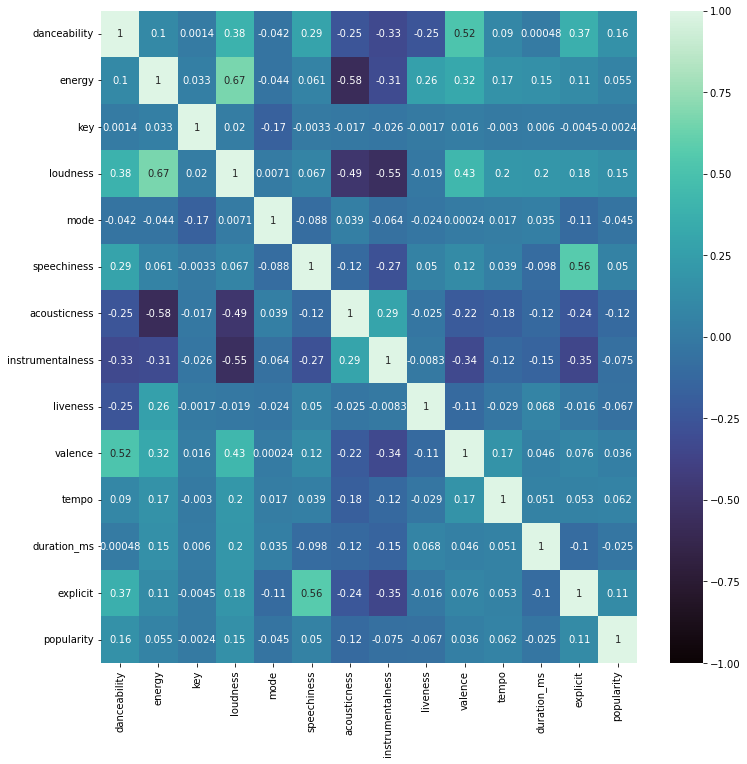

In [104]:
fig = plt.figure(figsize =(12, 12))
sns.heatmap(unpopular.corr(), vmin=-1, vmax=1, annot=True, cmap='mako')

Acousticness has the strongest negative correlation to popularity, while danceability, loudness, and explicit have the strongest positive correlations. The other metrics have weak correlation values, so they do not appear to be that important.

Here, we are able to see the range of values in each column, as well as the average and standard deviations. 

In [105]:
# track artists that appear the most in the dataset
unpopular.track_artist.value_counts().nlargest(20)

Alei Islah                                 75
Ocean Sounds                               70
Blackjesus Yoshua                          58
Native American Flute                      50
Sounds Of Nature : Thunderstorm, Rain      50
Paris Street                               50
Sounds of Nature Caribbean Rain Factory    49
Yoga Playlist                              49
Rare Essence                               44
Manic Vertex                               44
Outside Broadcast Recordings               44
ASMR Rain Sounds                           42
Lucky Luciano                              41
Lil Raff                                   41
Lofi Swole Beats                           40
Ruff Maab                                  40
Dat Boi T                                  37
The Paris Sights                           36
DC Powerhouse                              36
Star Sky Streaming Music by Frank          35
Name: track_artist, dtype: int64

In [106]:
# tracks with the lowest values for each category
category = unpopular.loc[:, 'danceability':'duration_ms'].columns
for i in category:
    unpop_category = unpopular.sort_values(by=i, ascending=False).tail(10)
    px.bar(unpop_category.track_name, title='Lowest '+  str.upper(i) + ' In Tracks of the Decade Amongst Unpopular Songs', height=800, template='plotly_dark', color_discrete_sequence=['green']).show()

Here, we highlight the worst of the worst: the lowest rating of each feature in the unpopular dataset. These features range from 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', to 'duration_ms.' The lowest 10 values of each feature is sown, ad we see that the lowest values are generally the same for each feature. 

In [107]:
# popularity values of the dataset
popularity = unpopular.popularity.value_counts()
popularity

0     2694
2     2146
1     2101
3     1494
14     544
4      457
5      309
13     248
6      212
15     152
7      137
8      112
10      80
9       59
12      59
11      45
16      19
17       5
18       4
Name: popularity, dtype: int64

In [108]:
# average popularity of the dataset
unpopular.popularity.mean()

3.078973981796451

In [109]:
# median popularity of the dataset
unpopular.popularity.median()

2.0

In [110]:
# Popularity Ratings
px.histogram(unpopular.popularity, title='Popularity Ratings of Unpopular Songs', template='plotly_dark', color_discrete_sequence=['green'])

We see the values of popularity in this dataset range from 0 to 18, with an average of 3.0, and a median of 2.0. This greatly differs from the metrics in the top10 dataset, where average popularity was in the 60's. This dataset is indeed unpopular, as the distribution is skewed to the right, with most values under 3. The mode of the dataset, the most common value, is zero. 

In [111]:
# most unpopular songs with 0 popularity
unpopular.query('popularity == 0').track_artist.value_counts()

Ocean Sounds                               60
Paris Street                               50
Sounds Of Nature : Thunderstorm, Rain      49
Sounds of Nature Caribbean Rain Factory    49
Yoga Playlist                              49
                                           ..
Sleep Water Sounds                          1
Winds and Oceans                            1
Teddy Pendergrass                           1
CHIC                                        1
Blushing Ocean Wave Sounds                  1
Name: track_artist, Length: 732, dtype: int64

In [112]:
# songs with less than 3 popularity
unpopular.query('popularity < 3').track_artist.value_counts()

Ocean Sounds                               68
Alei Islah                                 58
Native American Flute                      50
Paris Street                               50
Sounds of Nature Caribbean Rain Factory    49
                                           ..
Benny Benassi                               1
Armin van Buuren                            1
Gummibär                                    1
Eldest Son                                  1
Grupo Niche                                 1
Name: track_artist, Length: 1111, dtype: int64

In [113]:
# distribution of explicit songs
unpopular.explicit.value_counts()

False    7945
True     2932
Name: explicit, dtype: int64

In [114]:
# Distribution of Explicit Songs Amongst Unpopular Tracks
px.bar(unpopular.explicit.value_counts(), color=['Explicit', 'Non Explicit'], title='Distribution of Explicit Songs Amongst Unpopular Tracks', template='plotly_dark', color_discrete_sequence=['green', 'white'])

This illustrates the distribution of explicit lyrics in the songs of the unpopular dataset. We see that more songs are not explicit, than explicit. However, conclusions can not be made on the basis of a song's lack of popularity, solely by its explicit status.  

In [115]:
# convert explicit to json
convert_json(px.bar(unpopular.explicit.value_counts(), color=['Explicit', 'Non Explicit'], title='Distribution of Explicit Songs Amongst Unpopular Tracks', template='plotly_dark', color_discrete_sequence=['green']))

{
  "data": [
    {
      "alignmentgroup": "True",
      "hovertemplate": "color=Explicit<br>index=%{x}<br>value=%{y}<extra></extra>",
      "legendgroup": "Explicit",
      "marker": {
        "color": "green",
        "pattern": {
          "shape": ""
        }
      },
      "name": "Explicit",
      "offsetgroup": "Explicit",
      "orientation": "v",
      "showlegend": true,
      "textposition": "auto",
      "x": [
        false
      ],
      "xaxis": "x",
      "y": [
        7945
      ],
      "yaxis": "y",
      "type": "bar"
    },
    {
      "alignmentgroup": "True",
      "hovertemplate": "color=Non Explicit<br>index=%{x}<br>value=%{y}<extra></extra>",
      "legendgroup": "Non Explicit",
      "marker": {
        "color": "green",
        "pattern": {
          "shape": ""
        }
      },
      "name": "Non Explicit",
      "offsetgroup": "Non Explicit",
      "orientation": "v",
      "showlegend": true,
      "textposition": "auto",
      "x": [
        true
  

In [116]:
# category for tracks in unpopular songs
category = unpopular.loc[:, 'danceability':'duration_ms'].columns
for i in category:
    px.histogram(unpopular[i], title='Distribution of ' +  str.upper(i) + ' for Tracks Amongst Unpopular Songs', height=600, template='plotly_dark', color_discrete_sequence=['green']).show()

This series of graphs illustrates the distribution of features in the unpopular dataset. These features range from 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', to 'duration_ms.' Most of the distributions appear normaly distributed, some are uniform distribution, and others are skewed to either the right. Outliers are also visible in the distribution  of some metrics. 

In [117]:
# Grammys for each year
 # made from https://www.popvortex.com/music/grammy-awards/song-of-the-year.php

d= {'year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], 
    'song': ['Single Ladies (Put a Ring on It', 'Need You Now', 'Rolling in the Deep', 'We Are Young', 'Royals', 'Stay With Me', 'Thinking Out Loud', 'Hello', 'Thats What I Like', 'This Is America'], 
    'artist': ['Beyonce', 'Lady Antebellum', 'Adele', 'Fun. Featuring Janelle Monae', 'Lorde', 'Sam Smith', 'Ed Sheeran', 'Adele', 'Bruno Mars', 'Childish Gambino']}
grammys = pd.DataFrame(data=d)
print('Grammy Winners')
display(grammys)

Grammy Winners


year                             song                        artist
0  2010  Single Ladies (Put a Ring on It                       Beyonce
1  2011                     Need You Now               Lady Antebellum
2  2012              Rolling in the Deep                         Adele
3  2013                     We Are Young  Fun. Featuring Janelle Monae
4  2014                           Royals                         Lorde
5  2015                     Stay With Me                     Sam Smith
6  2016                Thinking Out Loud                    Ed Sheeran
7  2017                            Hello                         Adele
8  2018                Thats What I Like                    Bruno Mars
9  2019                  This Is America              Childish Gambino

In [118]:
# plotly grammys dataframe
colorscale = [[0, 'rgb(27,158,119)'],[.5, 'rgb(242,242,242)'],[1, 'rgb(242,242,242)']]
grammy_fig = ff.create_table(grammys, colorscale=colorscale)
grammy_fig.show()

In [119]:
# convert plotly grammys to json
convert_json(grammy_fig)

{
  "data": [
    {
      "colorscale": [
        [
          0,
          "rgb(27,158,119)"
        ],
        [
          0.5,
          "rgb(242,242,242)"
        ],
        [
          1,
          "rgb(242,242,242)"
        ]
      ],
      "hoverinfo": "none",
      "opacity": 0.75,
      "showscale": false,
      "z": [
        [
          0,
          0,
          0
        ],
        [
          0.5,
          0.5,
          0.5
        ],
        [
          1,
          1,
          1
        ],
        [
          0.5,
          0.5,
          0.5
        ],
        [
          1,
          1,
          1
        ],
        [
          0.5,
          0.5,
          0.5
        ],
        [
          1,
          1,
          1
        ],
        [
          0.5,
          0.5,
          0.5
        ],
        [
          1,
          1,
          1
        ],
        [
          0.5,
          0.5,
          0.5
        ],
        [
          1,
          1,
          1
   

In [120]:
# super bowl performers
# made from https://www.si.com/nfl/2019/02/03/super-bowl-halftime-performers-past-artists-all-time-list
f= {'year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],  
    'artist': ['The Who', 'The Black Eyed Peas, Usher, Slash', 'Madonna, LMFAO, Nicki Minaj, M.I.A, Cee Lo Green', 'Beyonce and Destinys Child', 'Bruno Mars and Red Hot Chili Peppers', 'Katy Perry, Lenny Kravitz, Missy Elliott', 'Coldplay, Beyonce, Bruno Mars, Mark Ronson', 'Lady Gaga', 'Justin Timberlake', 'Maroon 5 with Big Boi and Travis Scott']}
super_bowl = pd.DataFrame(data=f)
print('Super Bowl Performers')
display(super_bowl)

Super Bowl Performers


year                                            artist
0  2010                                           The Who
1  2011                 The Black Eyed Peas, Usher, Slash
2  2012  Madonna, LMFAO, Nicki Minaj, M.I.A, Cee Lo Green
3  2013                        Beyonce and Destinys Child
4  2014              Bruno Mars and Red Hot Chili Peppers
5  2015          Katy Perry, Lenny Kravitz, Missy Elliott
6  2016        Coldplay, Beyonce, Bruno Mars, Mark Ronson
7  2017                                         Lady Gaga
8  2018                                 Justin Timberlake
9  2019            Maroon 5 with Big Boi and Travis Scott

In [121]:
# plotyly super bowl performers
colorscale = [[0, 'rgb(27,158,119)'],[.5, 'rgb(242,242,242)'],[1, 'rgb(242,242,242)']]
super_bowl_fig = ff.create_table(super_bowl, colorscale=colorscale)
super_bowl_fig.show()

In [122]:
# convert plotly super bowl performers to json
convert_json(super_bowl_fig)

{
  "data": [
    {
      "colorscale": [
        [
          0,
          "rgb(27,158,119)"
        ],
        [
          0.5,
          "rgb(242,242,242)"
        ],
        [
          1,
          "rgb(242,242,242)"
        ]
      ],
      "hoverinfo": "none",
      "opacity": 0.75,
      "showscale": false,
      "z": [
        [
          0,
          0
        ],
        [
          0.5,
          0.5
        ],
        [
          1,
          1
        ],
        [
          0.5,
          0.5
        ],
        [
          1,
          1
        ],
        [
          0.5,
          0.5
        ],
        [
          1,
          1
        ],
        [
          0.5,
          0.5
        ],
        [
          1,
          1
        ],
        [
          0.5,
          0.5
        ],
        [
          1,
          1
        ]
      ],
      "type": "heatmap"
    }
  ],
  "layout": {
    "annotations": [
      {
        "align": "left",
        "font": {
          "color

In [123]:
# AMA Winners
# made from https://en.wikipedia.org/wiki/American_Music_Award_for_Artist_of_the_Year
g= {'year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],  
    'artist_of_the_year': ['Justin Bieber', 'Taylor Swift', 'Justin Bieber', 'Taylor Swift', 'One Direction', 'One Direction', 'Ariana Grande', 'Bruno Mars', 'Taylor Swift', 'Taylor Swift']}
amas = pd.DataFrame(data=g)
print('American Music Award Winners')
display(amas)

American Music Award Winners


year artist_of_the_year
0  2010      Justin Bieber
1  2011       Taylor Swift
2  2012      Justin Bieber
3  2013       Taylor Swift
4  2014      One Direction
5  2015      One Direction
6  2016      Ariana Grande
7  2017         Bruno Mars
8  2018       Taylor Swift
9  2019       Taylor Swift

In [124]:
# plotly ama winners
colorscale = [[0, 'rgb(27,158,119)'],[.5, 'rgb(242,242,242)'],[1, 'rgb(242,242,242)']]
amas_fig = ff.create_table(amas, colorscale=colorscale)
amas_fig.show()

In [125]:
# convert plotly ama winners to json
convert_json(amas_fig)

{
  "data": [
    {
      "colorscale": [
        [
          0,
          "rgb(27,158,119)"
        ],
        [
          0.5,
          "rgb(242,242,242)"
        ],
        [
          1,
          "rgb(242,242,242)"
        ]
      ],
      "hoverinfo": "none",
      "opacity": 0.75,
      "showscale": false,
      "z": [
        [
          0,
          0
        ],
        [
          0.5,
          0.5
        ],
        [
          1,
          1
        ],
        [
          0.5,
          0.5
        ],
        [
          1,
          1
        ],
        [
          0.5,
          0.5
        ],
        [
          1,
          1
        ],
        [
          0.5,
          0.5
        ],
        [
          1,
          1
        ],
        [
          0.5,
          0.5
        ],
        [
          1,
          1
        ]
      ],
      "type": "heatmap"
    }
  ],
  "layout": {
    "annotations": [
      {
        "align": "left",
        "font": {
          "color

In [126]:
# Billboard 
URL = 'https://en.wikipedia.org/wiki/List_of_Billboard_Hot_100_number-one_singles_of_the_2010s'

tables = pd.read_html(URL)
table1 = tables[2]

pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)


In [127]:
# Number 1 singles
table1.drop('Reference', axis=1, inplace=True)


C:\Users\XIX\AppData\Local\Temp\ipykernel_2064\445564116.py:2: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [128]:
# drop unnamed column
table1.drop('Unnamed: 6_level_0', axis=1, level=0, inplace=True)

In [129]:
# checking proper drop
table1.columns

MultiIndex([(                 '#', '2010'),
            ('Reached number one', '2010'),
            (         'Artist(s)', '2010'),
            (            'Single', '2010'),
            ('Weeks atnumber one', '2010')],
           )

In [130]:
# billboard 
table1.head()

# Reached number one                     Artist(s)              Single Weeks atnumber one
  2010               2010                          2010                2010               2010
0  980    January 2, 2010                         Kesha      "Tik Tok"♪ [4]                  9
1  981      March 6, 2010           The Black Eyed Peas           "Imma Be"                  2
2  982     March 20, 2010  Taio Cruz featuring Ludacris  "Break Your Heart"                  1
3  983     March 27, 2010                       Rihanna          "Rude Boy"                  5
4  984        May 1, 2010    B.o.B featuring Bruno Mars    "Nothin' on You"                  2

In [131]:
# plotly billboard
colorscale = [[0, 'rgb(27,158,119)'],[.5, 'rgb(242,242,242)'],[1, 'rgb(242,242,242)']]
table1_fig = ff.create_table(table1, colorscale=colorscale)
table1_fig.show()

In [132]:
# convert table 1 figure
convert_json(table1_fig)

{
  "data": [
    {
      "colorscale": [
        [
          0,
          "rgb(27,158,119)"
        ],
        [
          0.5,
          "rgb(242,242,242)"
        ],
        [
          1,
          "rgb(242,242,242)"
        ]
      ],
      "hoverinfo": "none",
      "opacity": 0.75,
      "showscale": false,
      "z": [
        [
          0,
          0,
          0,
          0,
          0
        ],
        [
          0.5,
          0.5,
          0.5,
          0.5,
          0.5
        ],
        [
          1,
          1,
          1,
          1,
          1
        ],
        [
          0.5,
          0.5,
          0.5,
          0.5,
          0.5
        ],
        [
          1,
          1,
          1,
          1,
          1
        ],
        [
          0.5,
          0.5,
          0.5,
          0.5,
          0.5
        ],
        [
          1,
          1,
          1,
          1,
          1
        ],
        [
          0.5,
          0.5,
      

In [133]:
# artists by total number one singles 
tables = pd.read_html(URL)
table2 = tables[3]
table2.columns=('artist', 'number_one_singles', 'singles')

pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)
print('Artist by Total Number-One Singles')
display(table2)

Artist by Total Number-One Singles


artist  number_one_singles                                            singles
0         Rihanna                   9  "Rude Boy" "Love the Way You Lie" "What's My N...
1      Katy Perry                   8  "California Gurls" "Teenage Dream" "Firework" ...
2      Bruno Mars                   7  "Nothin' on You" "Just the Way You Are" "Grena...
3           Drake                   6  "What's My Name?" "Work" "One Dance" "God's Pl...
4   Justin Bieber                   5  "What Do You Mean?" "Sorry" "Love Yourself" "I...
5    Taylor Swift                   5  "We Are Never Ever Getting Back Together" "Sha...
6           Adele                   4  "Rolling in the Deep" "Someone Like You" "Set ...
7     Post Malone                   4          "Rockstar" "Psycho" "Sunflower" "Circles"
8      The Weeknd                   4  "Can't Feel My Face" "The Hills" "Starboy" "He...
9          Eminem                   3  "Not Afraid" "Love the Way You Lie" "The Monster"
10          Kesha                   3                 "Tik Tok" "We R Who We R" "Timber"
11       Maroon 5                   3  "Moves like Jagger" "One More Night" "Girls Li...
12        Cardi B                   3        "Bodak Yellow" "I Like It" "Girls Like You"

In [134]:
# plotly artist total number one singles 
colorscale = [[0, 'rgb(27,158,119)'],[.5, 'rgb(242,242,242)'],[1, 'rgb(242,242,242)']]
table2_fig = ff.create_table(table2, colorscale=colorscale)
table2_fig.show()

In [135]:
# convert plotly to json
convert_json(table2_fig)

{
  "data": [
    {
      "colorscale": [
        [
          0,
          "rgb(27,158,119)"
        ],
        [
          0.5,
          "rgb(242,242,242)"
        ],
        [
          1,
          "rgb(242,242,242)"
        ]
      ],
      "hoverinfo": "none",
      "opacity": 0.75,
      "showscale": false,
      "z": [
        [
          0,
          0,
          0
        ],
        [
          0.5,
          0.5,
          0.5
        ],
        [
          1,
          1,
          1
        ],
        [
          0.5,
          0.5,
          0.5
        ],
        [
          1,
          1,
          1
        ],
        [
          0.5,
          0.5,
          0.5
        ],
        [
          1,
          1,
          1
        ],
        [
          0.5,
          0.5,
          0.5
        ],
        [
          1,
          1,
          1
        ],
        [
          0.5,
          0.5,
          0.5
        ],
        [
          1,
          1,
          1
   

In [136]:
# total number one singles 
px.histogram(table2, x='artist', y='number_one_singles', title='Total Number-One Singles', height=800, template='plotly_dark', color_discrete_sequence=['green'], labels={'artist': 'Artists', 'number_one_singles': 'Number One Singles'}).show()

This illustrates the Billboard Hot 100 total number one singles of artists in the decade between 2010 and 2019. WE see common names in this list, including Rihanna, Katy Perry, and Bruno Mars. Other names on this list are often featured in the top 10 artists of years between 2010 and 2019, from earlier in the data analysis. This makes senses, as popular artists should hold records for number one singles. 

In [137]:
# convert total number one singles to json
convert_json(px.histogram(table2, x='artist', y='number_one_singles', title='Total Number-One Singles', height=800, template='plotly_dark', color_discrete_sequence=['green']))

{
  "data": [
    {
      "alignmentgroup": "True",
      "bingroup": "x",
      "histfunc": "sum",
      "hovertemplate": "artist=%{x}<br>sum of number_one_singles=%{y}<extra></extra>",
      "legendgroup": "",
      "marker": {
        "color": "green",
        "pattern": {
          "shape": ""
        }
      },
      "name": "",
      "offsetgroup": "",
      "orientation": "v",
      "showlegend": false,
      "x": [
        "Rihanna",
        "Katy Perry",
        "Bruno Mars",
        "Drake",
        "Justin Bieber",
        "Taylor Swift",
        "Adele",
        "Post Malone",
        "The Weeknd",
        "Eminem",
        "Kesha",
        "Maroon 5",
        "Cardi B"
      ],
      "xaxis": "x",
      "y": [
        9,
        8,
        7,
        6,
        5,
        5,
        4,
        4,
        4,
        3,
        3,
        3,
        3
      ],
      "yaxis": "y",
      "type": "histogram"
    }
  ],
  "layout": {
    "template": {
      "data": {
        "ba

In [138]:
# Artists by total cumulative weeks at number-one
tables = pd.read_html(URL)
table3 = tables[4]
table3.columns = ('artist', 'weeks_at_number_one', 'singles')
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)
print('Total Cumulative Weeks at Number One')
display(table3)

Total Cumulative Weeks at Number One


artist  weeks_at_number_one                                            singles
0               Drake                   49  "What's My Name?" (1 week) "Work" (9 weeks) "O...
1             Rihanna                   41  "Rude Boy" (5 weeks) "Love the Way You Lie" (7...
2          Bruno Mars                   32  "Nothin' on You" (2 weeks) "Just the Way You A...
3          Katy Perry                   26  "California Gurls" (6 weeks) "Teenage Dream" (...
4               Adele                   24  "Rolling in the Deep" (7 weeks) "Someone Like ...
5       Justin Bieber                   23  "What Do You Mean?" (1 week) "Sorry" (3 weeks)...
6   Pharrell Williams                   22      "Blurred Lines" (12 weeks) "Happy" (10 weeks)
7            Maroon 5                   20  "Moves Like Jagger" (4 weeks) "One More Night"...
8           Lil Nas X                   19                         "Old Town Road" (19 weeks)
9        Taylor Swift                   18  "We Are Never Ever Getting Back Together" (3 w...
10         Ed Sheeran                   18      "Shape of You" (12 weeks) "Perfect" (6 weeks)
11    Billy Ray Cyrus                   18                         "Old Town Road" (18 weeks)

In [139]:
# plotly total cumulative weeks
colorscale = [[0, 'rgb(27,158,119)'],[.5, 'rgb(242,242,242)'],[1, 'rgb(242,242,242)']]
table3_fig = ff.create_table(table3, colorscale=colorscale)
table3_fig.show()

In [140]:
# convert plotly cumulative weeks to json
convert_json(table3)

{
  "artist": {
    "0": "Drake",
    "1": "Rihanna",
    "2": "Bruno Mars",
    "3": "Katy Perry",
    "4": "Adele",
    "5": "Justin Bieber",
    "6": "Pharrell Williams",
    "7": "Maroon 5",
    "8": "Lil Nas X",
    "9": "Taylor Swift",
    "10": "Ed Sheeran",
    "11": "Billy Ray Cyrus"
  },
  "weeks_at_number_one": {
    "0": 49,
    "1": 41,
    "2": 32,
    "3": 26,
    "4": 24,
    "5": 23,
    "6": 22,
    "7": 20,
    "8": 19,
    "9": 18,
    "10": 18,
    "11": 18
  },
  "singles": {
    "0": "\"What's My Name?\" (1 week) \"Work\" (9 weeks) \"One Dance\" (10 weeks) \"God's Plan\" (11 weeks) \"Nice for What\" (8 weeks) \"In My Feelings\" (10 weeks)",
    "1": "\"Rude Boy\" (5 weeks) \"Love the Way You Lie\" (7 weeks) \"What's My Name?\" (1 week) \"Only Girl (In the World)\" (1 week) \"S&M\" (1 week) \"We Found Love\" (10 weeks) \"Diamonds\" (3 weeks) \"The Monster\" (4 weeks) \"Work\" (9 weeks)",
    "2": "\"Nothin' on You\" (2 weeks) \"Just the Way You Are\" (4 weeks) \"G

In [141]:
# total cumulative weeks at number one
px.histogram(table3, x='artist', y='weeks_at_number_one', title='Total Cumulative Weeks at Number One', height=800, template='plotly_dark', color_discrete_sequence=['green'], labels={'artist': 'Artists', 'weeks_at_number_one': 'Weeks at Number One'}).show()

This figure shows the artists who appear on the Billboard Hot 100 list for an extended amount of weeks. The top artists are Drake, Rihanna, Bruno Mars, and Katy Perry. A few of these artsits, and others on the list, are well represented in the top 10 artists of eac year between 2010 and 2019. Cumulative weeks at number one suggests number on songs that have persisted at the top, or a series of songs that make the top of the list. 

In [142]:
# convert cumulative weeks at number 1 to json
convert_json(px.histogram(table3, x='artist', y='weeks_at_number_one', title='Total Cumulative Weeks at Number One', height=800, template='plotly_dark', color_discrete_sequence=['green']))

{
  "data": [
    {
      "alignmentgroup": "True",
      "bingroup": "x",
      "histfunc": "sum",
      "hovertemplate": "artist=%{x}<br>sum of weeks_at_number_one=%{y}<extra></extra>",
      "legendgroup": "",
      "marker": {
        "color": "green",
        "pattern": {
          "shape": ""
        }
      },
      "name": "",
      "offsetgroup": "",
      "orientation": "v",
      "showlegend": false,
      "x": [
        "Drake",
        "Rihanna",
        "Bruno Mars",
        "Katy Perry",
        "Adele",
        "Justin Bieber",
        "Pharrell Williams",
        "Maroon 5",
        "Lil Nas X",
        "Taylor Swift",
        "Ed Sheeran",
        "Billy Ray Cyrus"
      ],
      "xaxis": "x",
      "y": [
        49,
        41,
        32,
        26,
        24,
        23,
        22,
        20,
        19,
        18,
        18,
        18
      ],
      "yaxis": "y",
      "type": "histogram"
    }
  ],
  "layout": {
    "template": {
      "data": {
        "

In [143]:
# Songs by total number of weeks at number one
tables = pd.read_html(URL)
table4 = tables[5]
table4.drop('References', axis=1, inplace=True)
table4.columns = ('song', 'artists', 'weeks_at_number_one')
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)
print('Songs by Total Number of Weeks at Number One')
display(table4)

Songs by Total Number of Weeks at Number One


song                                            artists  weeks_at_number_one
0    "Old Town Road"                Lil Nas X featuring Billy Ray Cyrus                   19
1        "Despacito"  Luis Fonsi and Daddy Yankee featuring Justin B...                   16
2      "Uptown Funk"                   Mark Ronson featuring Bruno Mars                   14
3    "Blurred Lines"  Robin Thicke featuring T.I. and Pharrell Williams                   12
4    "See You Again"                 Wiz Khalifa featuring Charlie Puth                   12
5           "Closer"                  The Chainsmokers featuring Halsey                   12
6     "Shape of You"                                         Ed Sheeran                   12
7       "God's Plan"                                              Drake                   11
8    "We Found Love"                    Rihanna featuring Calvin Harris                   10
9            "Happy"                                  Pharrell Williams                   10
10           "Hello"                                              Adele                   10
11       "One Dance"                    Drake featuring Wizkid and Kyla                   10
12  "In My Feelings"                                              Drake                   10

In [144]:
# plotly songs total number of weeks at number one
colorscale = [[0, 'rgb(27,158,119)'],[.5, 'rgb(242,242,242)'],[1, 'rgb(242,242,242)']]
table4_fig = ff.create_table(table4, colorscale=colorscale)
table4_fig.show()

In [145]:
# histogram songs total weeks at number 1
px.histogram(table4, x='song', y='weeks_at_number_one', title='Songs by Total Number of Weeks at Number One', height=800, template='plotly_dark', color_discrete_sequence=['green'], labels={'song': 'Song', 'weeks_at_number_one': 'Weeks at Number One'}).show()

This figure shows the songs that made the Billboard Hot 100 from 2010 to 2019, and have stayed on top of the list for an extended period of time. The song with the most weeks at number one is "Old Town Road" by Lil Nas X, featuring Billy Ray Cyrus. Other artists that we have seen before includes, but is not limited to, Drake, Rihanna, Bruno Mars, Adele, and Pharell Williams. The songs on this list are likely to have made the top 10 of their respective release years.

In [146]:
# Convert total number of weeks number one
convert_json(table4)

{
  "song": {
    "0": "\"Old Town Road\"",
    "1": "\"Despacito\"",
    "2": "\"Uptown Funk\"",
    "3": "\"Blurred Lines\"",
    "4": "\"See You Again\"",
    "5": "\"Closer\"",
    "6": "\"Shape of You\"",
    "7": "\"God's Plan\"",
    "8": "\"We Found Love\"",
    "9": "\"Happy\"",
    "10": "\"Hello\"",
    "11": "\"One Dance\"",
    "12": "\"In My Feelings\""
  },
  "artists": {
    "0": "Lil Nas X featuring Billy Ray Cyrus",
    "1": "Luis Fonsi and Daddy Yankee featuring Justin Bieber",
    "2": "Mark Ronson featuring Bruno Mars",
    "3": "Robin Thicke featuring T.I. and Pharrell Williams",
    "4": "Wiz Khalifa featuring Charlie Puth",
    "5": "The Chainsmokers featuring Halsey",
    "6": "Ed Sheeran",
    "7": "Drake",
    "8": "Rihanna featuring Calvin Harris",
    "9": "Pharrell Williams",
    "10": "Adele",
    "11": "Drake featuring Wizkid and Kyla",
    "12": "Drake"
  },
  "weeks_at_number_one": {
    "0": 19,
    "1": 16,
    "2": 14,
    "3": 12,
    "4": 12,
    

***********************************

## Comparisons

Lets make some comparisons between features of popular and unpopular songs, see if we can identify what makes some popular and others less popular. 

In [147]:
fig, ax = plt.subplots()
ax.boxplot((top10.bpm, unpopular.tempo))
ax.set_xticklabels(("top10 bpm", 'unpopular bpm'))
ax.set_ylabel("BPM")
ax.set_title("BPM Comparison")
plt.show()

We can see from these boxplots that the average Tempo of the songs is the same, however we can see in the popular songs they are in a much narrower range. If one is planning to make a popular song they might be better off trying to set the tempo in the 100-125 range. 

In [148]:
fig, ax = plt.subplots()
ax.boxplot((top10.nrgy, unpopular.energy*100))
ax.set_xticklabels(("top10 Energy", 'unpopular Energy'))
ax.set_ylabel("Energy")
ax.set_title("Energy Comparison")
plt.show()

We can see on average the popular songs have higher energy than unpopular songs. It is still possible for low energy songs to become popular, but if one is planning to make the song that has a higher chance of success they might want to try the tried and true formula of having the energy between 60-80. 

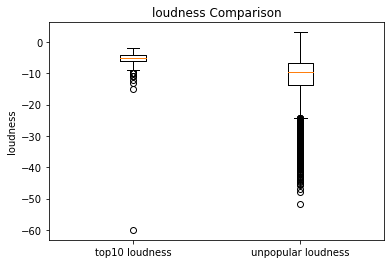

In [149]:
fig, ax = plt.subplots()
ax.boxplot((top10.dB, unpopular.loudness))
ax.set_xticklabels(("top10 loudness", 'unpopular loudness'))
ax.set_ylabel("loudness")
ax.set_title("loudness Comparison")
plt.show()

Interestingly for this one, loudness is in a very small range for the popular songs, except for a single outlier. we can see that unpopular songs are on average quieter than popular songs. It might be therefore a good idea to set a songs loudness between 0 and -10 dB when trying to make a popular song. 

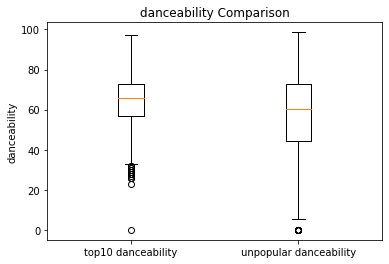

In [150]:
fig, ax = plt.subplots()
ax.boxplot((top10.dnce, unpopular.danceability*100))
ax.set_xticklabels(("top10 danceability", 'unpopular danceability'))
ax.set_ylabel("danceability")
ax.set_title("danceability Comparison")
plt.show()

We can see that danceability has a wider range than other metrics, however it still appears that popular songs are on average more danceable than unpopular songs. It appears that for the best chance of success, the song should have a danceability score between 60 and 80.

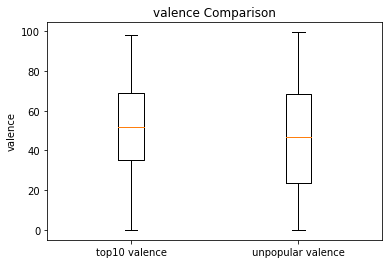

In [151]:
fig, ax = plt.subplots()
ax.boxplot((top10.val, unpopular.valence*100))
ax.set_xticklabels(("top10 valence", 'unpopular valence'))
ax.set_ylabel("valence")
ax.set_title("valence Comparison")
plt.show()

We can see that there is a wide spread on Valence for both popular and unpopular songs. While the average valence for popular songs is slightly higher than that of unpopular songs, the difference is not significant enough to be something that should be considered critical to a song's success. 

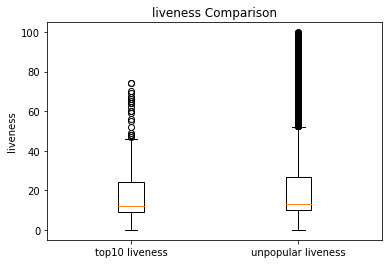

In [152]:
fig, ax = plt.subplots()
ax.boxplot((top10.live, unpopular.liveness*100))
ax.set_xticklabels(("top10 liveness", 'unpopular liveness'))
ax.set_ylabel("liveness")
ax.set_title("liveness Comparison")
plt.show()

The liveness scores of both popular and unpopular songs are on average similar. This indicates that liveness may have little impact on the popularity of the song. It could also mean that producers are less likely to produce songs with a high liveness score, meaning that we cannot fully interpret how liveness would affect the overall popularity. 

In [153]:
fig, ax = plt.subplots()
ax.boxplot((top10.acous, unpopular.acousticness*100))
ax.set_xticklabels(("top10 acousticness", 'unpopular acousticness'))
ax.set_ylabel("acousticness")
ax.set_title("acousticness Comparison")
plt.show()

We can see that the acousticness of the song appears to have some impact on popularity. It is far less common for songs that are more 'acoustic' to perform very well. We can see that there are still a number of acoustic songs at the top, so an acoustic song is not completely doomed. 

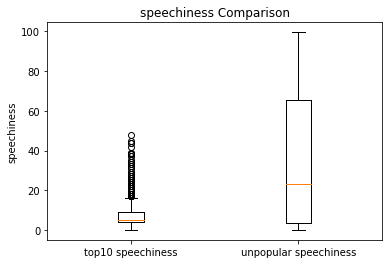

In [154]:
fig, ax = plt.subplots()
ax.boxplot((top10.spch, unpopular.acousticness*100))
ax.set_xticklabels(("top10 speechiness", 'unpopular speechiness'))
ax.set_ylabel("speechiness")
ax.set_title("speechiness Comparison")
plt.show()

It is interesting to note that popular songs are less speechy on average than unpopular songs. This appears to be an important factor contributing to the popularity of the song. If one wants to make a hit they should definitely keep the speechiness score below 50, and if they want the highest chance of success it should be below 10.

## Overall Conclusions

Overall, we see trends in the top 10 dataset, with songs that are critically acclaimed, and featured in popular culture, TV, or movies, top the song popularity lists on Spotify. This supports the notion that global events, with regard to music and the industry, are correlated to the listening preferences on the platform. In other words, critically acclaimed songs, and popular artists, are also popular on Spotify. The popularity score determined by Spotify is also fairly accurate, as popular songs determined by the platform are actually well received in the US and also worldwide. 

The full dataset illustrated the amount of songs it would take to be the top listener on the platform. That title wild be difficult to take, unless one listens to music for over 200 days straight. 

The unpopular dataset gave us clues in features that are correlated to songs being unpopular. 

Finally, we collected data from the Billboard Hot 100 list to support our theory that awards and other similar music events would be prevalent among the top songs on the platform. The billboard top artists and songs were also feature in Spotify's top ten dataset, with respect to the years 2010 to 2019. 